In [18]:
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt

__Add the downloaded Data set as a text file minist_data.txt .Open the file and read the tables.Each row contains the vales which make up the 28*28  image of handwritten digits.The data can be downloaded or directly used from the URL

In [31]:
X=open("mnist_data.txt","r")
Features=pd.read_table(X,header=None,sep='\s+')
len(Features)
Features

,0,1,2,3,4,5,6,7,8,9,...,774,775,776,777,778,779,780,781,782,783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [32]:
Y=open("mnist_labels.txt","r")
Labels=pd.read_table(Y,header=None)

__The labels are in the file minist_labels.txt.This contains the actual value of each handwritten digit

In [33]:
Yarray=np.asarray(Labels)
Yarray.shape

(10000, 1)

__Converting the Labels dataframe into an array

In [34]:
for i in range(len(Labels)):
    if Yarray.item(i)==8:
        Yarray[i]=1
    else:
        Yarray[i]=0


__To make this a 2 class logistic regression we need to convert the labels into 2 values 1 and 0 which is being done here.Everything apart from 8 is 0 and 8 is 1.

In [35]:
Yarray

array([[0],
       [0],
       [0],
       ...,
       [0],
       [0],
       [0]], dtype=int64)

In [61]:
Xarray=np.asarray(Features)
Xarray.shape
Xarray

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

__Converting the features into an array called Xarray

In [62]:
wts=np.zeros(Xarray.shape[1])
wts.shape

(784,)

__Inistalising weight vector first as all zeros and making then of dimention 1 * 784

In [63]:
wts=wts.reshape(1,784)
wts.shape

(1, 784)

In [64]:
def sigmoid(z):
    return  1.0/(1.0+np.exp(-z))

__Calculate the sigmoid using the formula 1/(1+e^-z)

In [65]:
test=sigmoid(0)
test

0.5

In [66]:
def predictions(Xarray,wts):
    return sigmoid(Xarray.dot(wts.T))

__By calling the sigmoid function we get the probability that an input belongs to a particular class

In [67]:
predictions(Xarray,wts).shape

(10000, 1)

In [68]:
New_wts.shape

(1, 784)

In [75]:
def GetFinalWeights(wts,Xarray,Yarray,Alpha=0.0005,NoI=5000):
    for i in range (NoI):
        diffVector=predictions(Xarray,wts)-Yarray
        Gradient=diffVector.T.dot(Xarray)
        #1* 784
        wts=wts-Alpha*Gradient
        if i%500==0:
            print("the new wts" ,wts)
    return wts
        

__Alpha gives the step value.If Alpha is too large then it is possible to loose the point where it reaches minimum
NoI is my stopping critiria.The accuracy increases with increase in Number of Iterationas
We try to find the errors by subtracting the labels array from predictions.
This error(diffVector) with the dot product of Xarray will give the gradient
the product of gradient and alpha would give the weight vector.

In [76]:
New_wts=GetFinalWeights(wts,Xarray,Yarray)

the new wts [[ 0.0000000e+00  0.0000000e+00  0.0000000e+00  0.0000000e+00
   0.0000000e+00  0.0000000e+00  0.0000000e+00  0.0000000e+00
   0.0000000e+00  0.0000000e+00  0.0000000e+00  0.0000000e+00
   0.0000000e+00  0.0000000e+00  0.0000000e+00  0.0000000e+00
   0.0000000e+00  0.0000000e+00  0.0000000e+00  0.0000000e+00
   0.0000000e+00  0.0000000e+00  0.0000000e+00  0.0000000e+00
   0.0000000e+00  0.0000000e+00  0.0000000e+00  0.0000000e+00
   0.0000000e+00  0.0000000e+00  0.0000000e+00  0.0000000e+00
   0.0000000e+00 -9.5000000e-03 -5.9000000e-02 -3.9500000e-02
  -1.0075000e-01 -1.2775000e-01 -2.6175000e-01 -5.8575000e-01
  -7.7200000e-01 -6.6500000e-01 -7.7025000e-01 -5.8575000e-01
  -1.7275000e-01 -2.2425000e-01 -2.3500000e-01 -1.2550000e-01
  -4.8000000e-02  0.0000000e+00  0.0000000e+00  0.0000000e+00
   0.0000000e+00  0.0000000e+00  0.0000000e+00  0.0000000e+00
   0.0000000e+00  0.0000000e+00  0.0000000e+00  0.0000000e+00
   0.0000000e+00 -1.0925000e-01 -2.7875000e-01 -3.6325000e

the new wts [[ 0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00 -9.50000000e-03 -5.90000000e-02 -3.95000000e-02
  -1.00750000e-01 -1.80750000e-01 -3.89250000e-01 -2.67275000e+00
  -3.23845000e+01 -6.18900000e+00 -1.90125000e+00 -1.61825000e+00
  -2.58750000e-01 -9.08025000e+00 -2.57210000e+01 -1.25500000e-01
  -4.80000000e-02  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+0

the new wts [[ 0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00 -9.50000000e-03 -5.90000000e-02 -3.95000000e-02
  -1.00750000e-01 -1.80750000e-01 -3.89250000e-01 -3.99275000e+00
  -5.34220000e+01 -9.57150000e+00 -1.90125000e+00 -1.61825000e+00
  -2.58750000e-01 -1.79197500e+01 -5.14925000e+01 -1.25500000e-01
  -4.80000000e-02  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+0

the new wts [[ 0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00 -9.50000000e-03 -5.90000000e-02 -3.95000000e-02
  -1.00750000e-01 -1.80750000e-01 -3.89250000e-01 -4.71275000e+00
  -6.48970000e+01 -1.14165000e+01 -1.90125000e+00 -1.61825000e+00
  -2.58750000e-01 -2.47357500e+01 -7.13645000e+01 -1.25500000e-01
  -4.80000000e-02  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+0

the new wts [[ 0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00 -9.50000000e-03 -5.90000000e-02 -3.95000000e-02
  -1.00750000e-01 -1.80750000e-01 -3.89250000e-01 -5.02475000e+00
  -6.98695000e+01 -1.22160000e+01 -1.90125000e+00 -1.61825000e+00
  -2.58750000e-01 -2.95992500e+01 -8.55440000e+01 -1.25500000e-01
  -4.80000000e-02  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+0

the new wts [[ 0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00 -9.50000000e-03 -5.90000000e-02 -3.95000000e-02
  -1.00750000e-01 -1.80750000e-01 -3.89250000e-01 -5.12075000e+00
  -7.13995000e+01 -1.24620000e+01 -1.90125000e+00 -1.61825000e+00
  -2.58750000e-01 -3.32557500e+01 -9.62045000e+01 -1.25500000e-01
  -4.80000000e-02  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+0

the new wts [[ 0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00 -9.50000000e-03 -5.90000000e-02 -3.95000000e-02
  -1.00750000e-01 -1.80750000e-01 -3.89250000e-01 -5.19275000e+00
  -7.25470000e+01 -1.26465000e+01 -1.90125000e+00 -1.61825000e+00
  -2.58750000e-01 -3.57762500e+01 -1.03553000e+02 -1.25500000e-01
  -4.80000000e-02  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+0

the new wts [[ 0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00 -9.50000000e-03 -5.90000000e-02 -3.95000000e-02
  -1.00750000e-01 -1.80750000e-01 -3.89250000e-01 -5.20875000e+00
  -7.28020000e+01 -1.26875000e+01 -1.90125000e+00 -1.61825000e+00
  -2.58750000e-01 -3.75867500e+01 -1.08831500e+02 -1.25500000e-01
  -4.80000000e-02  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+0

the new wts [[ 0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00 -9.50000000e-03 -5.90000000e-02 -3.95000000e-02
  -1.00750000e-01 -1.80750000e-01 -3.89250000e-01 -5.20875000e+00
  -7.28020000e+01 -1.26875000e+01 -1.90125000e+00 -1.61825000e+00
  -2.58750000e-01 -3.86162500e+01 -1.11833000e+02 -1.25500000e-01
  -4.80000000e-02  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+0

the new wts [[ 0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00 -9.50000000e-03 -5.90000000e-02 -3.95000000e-02
  -1.00750000e-01 -1.80750000e-01 -3.89250000e-01 -5.20875000e+00
  -7.28020000e+01 -1.26875000e+01 -1.90125000e+00 -1.61825000e+00
  -2.58750000e-01 -3.94327500e+01 -1.14213500e+02 -1.25500000e-01
  -4.80000000e-02  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+0

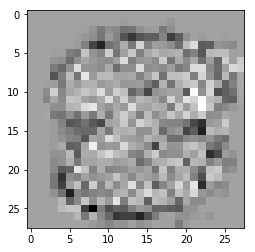

In [77]:
plt.imshow(New_wts.reshape(28,28),cmap='gray')
plt.show()

__The above is the image of a ghostly 8 .The darker regions around the 8 are made so by giving higher weights to them hence the black is darker arounf here and lesser weights to the lighter section.The distribution of dark and light pixels inside and around 8 are such that this model could predict handwritten 8s which alsways wouldnot look exactly alike,there was there is more general distribution of pixels.

In [78]:
def Accuracy(Xarray,Yarray,New_wts):
    res=0
    Preds=predictions(Xarray,New_wts)
    print(Preds)
    for i in range(len(Preds)):
        if Yarray[i]==Preds[i]:
            res+=1
    return res/(len(Preds))
    

__Accuracy gives how well the model is able to predict the handrwriiten digits in the training data.

In [79]:
ACC=Accuracy(Xarray,Yarray,New_wts)
ACC

[[0.]
 [0.]
 [0.]
 ...
 [0.]
 [0.]
 [0.]]


0.9575

__95 % Accuracy is obtained with aplha step of 0.0005 and number of Iteration of 5000.The accuracy of correct predictions could be inceases by reducing the alphs steps further(moving smaller and slower steps) and by increasing the iterations.Here I am using 5000 as my stopping criteria as good reseult(95%) is obtained.More that this iterations may increses the percentage but computations would be higher

In [80]:
def GetFinalWeightsAvoidOverfitting(wts,Xarray,Yarray,lambda_var,Alpha=0.0005,NoI=8000):
    for i in range (NoI):
        diffVector=predictions(Xarray,wts)-Yarray
        Gradient=diffVector.T.dot(Xarray) + lambda_var*(np.sum(np.abs(wts)))
        #1* 784
        wts=wts-Alpha*Gradient
        if i%500==0:
            print("the new wts" ,wts)
    return wts

In [84]:
Acc_values = []
def plotAccuracyVsLambda():
    lambda_values = [0.001,0.01,0.05,1]
    for lambda_var in lambda_values:
        new_wts = GetFinalWeightsAvoidOverfitting(wts,Xarray,Yarray,lambda_var)
        accu = Accuracy(Xarray,Yarray,new_wts)
        Acc_values.append(accu)
        print(accu,lambda_var)
    plt.plot(lambda_values,Acc_values)
    plt.show()

the new wts [[ 0.0000000e+00  0.0000000e+00  0.0000000e+00  0.0000000e+00
   0.0000000e+00  0.0000000e+00  0.0000000e+00  0.0000000e+00
   0.0000000e+00  0.0000000e+00  0.0000000e+00  0.0000000e+00
   0.0000000e+00  0.0000000e+00  0.0000000e+00  0.0000000e+00
   0.0000000e+00  0.0000000e+00  0.0000000e+00  0.0000000e+00
   0.0000000e+00  0.0000000e+00  0.0000000e+00  0.0000000e+00
   0.0000000e+00  0.0000000e+00  0.0000000e+00  0.0000000e+00
   0.0000000e+00  0.0000000e+00  0.0000000e+00  0.0000000e+00
   0.0000000e+00 -9.5000000e-03 -5.9000000e-02 -3.9500000e-02
  -1.0075000e-01 -1.2775000e-01 -2.6175000e-01 -5.8575000e-01
  -7.7200000e-01 -6.6500000e-01 -7.7025000e-01 -5.8575000e-01
  -1.7275000e-01 -2.2425000e-01 -2.3500000e-01 -1.2550000e-01
  -4.8000000e-02  0.0000000e+00  0.0000000e+00  0.0000000e+00
   0.0000000e+00  0.0000000e+00  0.0000000e+00  0.0000000e+00
   0.0000000e+00  0.0000000e+00  0.0000000e+00  0.0000000e+00
   0.0000000e+00 -1.0925000e-01 -2.7875000e-01 -3.6325000e

the new wts [[ -18.97412996  -18.97412996  -18.97412996  -18.97412996  -18.97412996
   -18.97412996  -18.97412996  -18.97412996  -18.97412996  -18.97412996
   -18.97412996  -18.97412996  -18.97412996  -18.97412996  -18.97412996
   -18.97412996  -18.97412996  -18.97412996  -18.97412996  -18.97412996
   -18.97412996  -18.97412996  -18.97412996  -18.97412996  -18.97412996
   -18.97412996  -18.97412996  -18.97412996  -18.97412996  -18.97412996
   -18.97412996  -18.97412996  -18.97412996  -18.98362996  -19.03312996
   -19.01362996  -19.07487996  -19.15487996  -19.36337996  -21.61487996
   -50.85112991  -25.16262995  -21.00237996  -20.59787996  -19.23287996
   -28.05437996  -44.69512996  -19.09962996  -19.02212996  -18.97412996
   -18.97412996  -18.97412996  -18.97412996  -18.97412996  -18.97412996
   -18.97412996  -18.97412996  -18.97412996  -18.97412996  -18.97412996
   -18.97412996  -19.08337996  -19.25287996  -20.64937996  -31.39287996
   -68.89112996  -59.44212996  -58.83962996 -108.526

the new wts [[ -47.48170781  -47.48170781  -47.48170781  -47.48170781  -47.48170781
   -47.48170781  -47.48170781  -47.48170781  -47.48170781  -47.48170781
   -47.48170781  -47.48170781  -47.48170781  -47.48170781  -47.48170781
   -47.48170781  -47.48170781  -47.48170781  -47.48170781  -47.48170781
   -47.48170781  -47.48170781  -47.48170781  -47.48170781  -47.48170781
   -47.48170781  -47.48170781  -47.48170781  -47.48170781  -47.48170781
   -47.48170781  -47.48170781  -47.48170781  -47.49120781  -47.54070781
   -47.52120781  -47.58245781  -47.66245781  -47.87095781  -51.1624578
   -95.93370776  -56.3352078   -49.50995781  -49.10545781  -47.74045781
   -65.08195781  -98.04270781  -47.60720781  -47.52970781  -47.48170781
   -47.48170781  -47.48170781  -47.48170781  -47.48170781  -47.48170781
   -47.48170781  -47.48170781  -47.48170781  -47.48170781  -47.48170781
   -47.48170781  -47.59095781  -47.76045781  -52.90097137  -85.39403326
  -158.26181506 -122.4377892  -113.64873324 -209.0407

the new wts [[-8.31081650e+01 -8.31081650e+01 -8.31081650e+01 -8.31081650e+01
  -8.31081650e+01 -8.31081650e+01 -8.31081650e+01 -8.31081650e+01
  -8.31081650e+01 -8.31081650e+01 -8.31081650e+01 -8.31081650e+01
  -8.31081650e+01 -8.31081650e+01 -8.31081650e+01 -8.31081650e+01
  -8.31081650e+01 -8.31081650e+01 -8.31081650e+01 -8.31081650e+01
  -8.31081650e+01 -8.31081650e+01 -8.31081650e+01 -8.31081650e+01
  -8.31081650e+01 -8.31081650e+01 -8.31081650e+01 -8.31081650e+01
  -8.31081650e+01 -8.31081650e+01 -8.31081650e+01 -8.31081650e+01
  -8.31081650e+01 -8.31176650e+01 -8.31671650e+01 -8.31476650e+01
  -8.32089150e+01 -8.32889150e+01 -8.34974150e+01 -8.71009150e+01
  -1.36532665e+02 -9.27611650e+01 -8.51364150e+01 -8.47319150e+01
  -8.33669150e+01 -1.05784918e+02 -1.48469675e+02 -8.32336650e+01
  -8.31561650e+01 -8.31081650e+01 -8.31081650e+01 -8.31081650e+01
  -8.31081650e+01 -8.31081650e+01 -8.31081650e+01 -8.31081650e+01
  -8.31081650e+01 -8.31081650e+01 -8.31081650e+01 -8.31081650e+0

the new wts [[-1.25598940e+02 -1.25598940e+02 -1.25598940e+02 -1.25598940e+02
  -1.25598940e+02 -1.25598940e+02 -1.25598940e+02 -1.25598940e+02
  -1.25598940e+02 -1.25598940e+02 -1.25598940e+02 -1.25598940e+02
  -1.25598940e+02 -1.25598940e+02 -1.25598940e+02 -1.25598940e+02
  -1.25598940e+02 -1.25598940e+02 -1.25598940e+02 -1.25598940e+02
  -1.25598940e+02 -1.25598940e+02 -1.25598940e+02 -1.25598940e+02
  -1.25598940e+02 -1.25598940e+02 -1.25598940e+02 -1.25598940e+02
  -1.25598940e+02 -1.25598940e+02 -1.25598940e+02 -1.25598940e+02
  -1.25598940e+02 -1.25608440e+02 -1.25657940e+02 -1.25638440e+02
  -1.25699690e+02 -1.25779690e+02 -1.25988190e+02 -1.29599690e+02
  -1.79150940e+02 -1.35272440e+02 -1.27627190e+02 -1.27222690e+02
  -1.25857690e+02 -1.50618693e+02 -1.97791449e+02 -1.25724440e+02
  -1.25646940e+02 -1.25598940e+02 -1.25598940e+02 -1.25598940e+02
  -1.25598940e+02 -1.25598940e+02 -1.25598940e+02 -1.25598940e+02
  -1.25598940e+02 -1.25598940e+02 -1.25598940e+02 -1.25598940e+0

the new wts [[-1.74700936e+02 -1.74700936e+02 -1.74700936e+02 -1.74700936e+02
  -1.74700936e+02 -1.74700936e+02 -1.74700936e+02 -1.74700936e+02
  -1.74700936e+02 -1.74700936e+02 -1.74700936e+02 -1.74700936e+02
  -1.74700936e+02 -1.74700936e+02 -1.74700936e+02 -1.74700936e+02
  -1.74700936e+02 -1.74700936e+02 -1.74700936e+02 -1.74700936e+02
  -1.74700936e+02 -1.74700936e+02 -1.74700936e+02 -1.74700936e+02
  -1.74700936e+02 -1.74700936e+02 -1.74700936e+02 -1.74700936e+02
  -1.74700936e+02 -1.74700936e+02 -1.74700936e+02 -1.74700936e+02
  -1.74700936e+02 -1.74710436e+02 -1.74759936e+02 -1.74740436e+02
  -1.74801686e+02 -1.74881686e+02 -1.75090186e+02 -1.78701686e+02
  -2.28252936e+02 -1.84374436e+02 -1.76729186e+02 -1.76324686e+02
  -1.74959686e+02 -2.00395190e+02 -2.48859946e+02 -1.74826436e+02
  -1.74748936e+02 -1.74700936e+02 -1.74700936e+02 -1.74700936e+02
  -1.74700936e+02 -1.74700936e+02 -1.74700936e+02 -1.74700936e+02
  -1.74700936e+02 -1.74700936e+02 -1.74700936e+02 -1.74700936e+0

the new wts [[-2.30419947e+02 -2.30419947e+02 -2.30419947e+02 -2.30419947e+02
  -2.30419947e+02 -2.30419947e+02 -2.30419947e+02 -2.30419947e+02
  -2.30419947e+02 -2.30419947e+02 -2.30419947e+02 -2.30419947e+02
  -2.30419947e+02 -2.30419947e+02 -2.30419947e+02 -2.30419947e+02
  -2.30419947e+02 -2.30419947e+02 -2.30419947e+02 -2.30419947e+02
  -2.30419947e+02 -2.30419947e+02 -2.30419947e+02 -2.30419947e+02
  -2.30419947e+02 -2.30419947e+02 -2.30419947e+02 -2.30419947e+02
  -2.30419947e+02 -2.30419947e+02 -2.30419947e+02 -2.30419947e+02
  -2.30419947e+02 -2.30429447e+02 -2.30478947e+02 -2.30459447e+02
  -2.30520697e+02 -2.30600697e+02 -2.30809197e+02 -2.34420697e+02
  -2.83971947e+02 -2.40093447e+02 -2.32448197e+02 -2.32043697e+02
  -2.30678697e+02 -2.56256201e+02 -3.04992957e+02 -2.30545447e+02
  -2.30467947e+02 -2.30419947e+02 -2.30419947e+02 -2.30419947e+02
  -2.30419947e+02 -2.30419947e+02 -2.30419947e+02 -2.30419947e+02
  -2.30419947e+02 -2.30419947e+02 -2.30419947e+02 -2.30419947e+0

the new wts [[ -293.04903074  -293.04903074  -293.04903074  -293.04903074
   -293.04903074  -293.04903074  -293.04903074  -293.04903074
   -293.04903074  -293.04903074  -293.04903074  -293.04903074
   -293.04903074  -293.04903074  -293.04903074  -293.04903074
   -293.04903074  -293.04903074  -293.04903074  -293.04903074
   -293.04903074  -293.04903074  -293.04903074  -293.04903074
   -293.04903074  -293.04903074  -293.04903074  -293.04903074
   -293.04903074  -293.04903074  -293.04903074  -293.04903074
   -293.04903074  -293.05853074  -293.10803074  -293.08853074
   -293.14978074  -293.22978074  -293.43828074  -297.04978073
   -346.60103069  -302.72253073  -295.07728074  -294.67278074
   -293.30778074  -318.8852841   -367.62204055  -293.17453074
   -293.09703074  -293.04903074  -293.04903074  -293.04903074
   -293.04903074  -293.04903074  -293.04903074  -293.04903074
   -293.04903074  -293.04903074  -293.04903074  -293.04903074
   -293.04903074  -293.15828074  -293.32778074  -302.19629

the new wts [[-3.62909267e+02 -3.62909267e+02 -3.62909267e+02 -3.62909267e+02
  -3.62909267e+02 -3.62909267e+02 -3.62909267e+02 -3.62909267e+02
  -3.62909267e+02 -3.62909267e+02 -3.62909267e+02 -3.62909267e+02
  -3.62909267e+02 -3.62909267e+02 -3.62909267e+02 -3.62909267e+02
  -3.62909267e+02 -3.62909267e+02 -3.62909267e+02 -3.62909267e+02
  -3.62909267e+02 -3.62909267e+02 -3.62909267e+02 -3.62909267e+02
  -3.62909267e+02 -3.62909267e+02 -3.62909267e+02 -3.62909267e+02
  -3.62909267e+02 -3.62909267e+02 -3.62909267e+02 -3.62909267e+02
  -3.62909267e+02 -3.62918767e+02 -3.62968267e+02 -3.62948767e+02
  -3.63010017e+02 -3.63090017e+02 -3.63298517e+02 -3.66910017e+02
  -4.16461267e+02 -3.72582767e+02 -3.64937517e+02 -3.64533017e+02
  -3.63168017e+02 -3.88745521e+02 -4.37482277e+02 -3.63034767e+02
  -3.62957267e+02 -3.62909267e+02 -3.62909267e+02 -3.62909267e+02
  -3.62909267e+02 -3.62909267e+02 -3.62909267e+02 -3.62909267e+02
  -3.62909267e+02 -3.62909267e+02 -3.62909267e+02 -3.62909267e+0

the new wts [[-4.40451997e+02 -4.40451997e+02 -4.40451997e+02 -4.40451997e+02
  -4.40451997e+02 -4.40451997e+02 -4.40451997e+02 -4.40451997e+02
  -4.40451997e+02 -4.40451997e+02 -4.40451997e+02 -4.40451997e+02
  -4.40451997e+02 -4.40451997e+02 -4.40451997e+02 -4.40451997e+02
  -4.40451997e+02 -4.40451997e+02 -4.40451997e+02 -4.40451997e+02
  -4.40451997e+02 -4.40451997e+02 -4.40451997e+02 -4.40451997e+02
  -4.40451997e+02 -4.40451997e+02 -4.40451997e+02 -4.40451997e+02
  -4.40451997e+02 -4.40451997e+02 -4.40451997e+02 -4.40451997e+02
  -4.40451997e+02 -4.40461497e+02 -4.40510997e+02 -4.40491497e+02
  -4.40552747e+02 -4.40632747e+02 -4.40841247e+02 -4.44452747e+02
  -4.94003997e+02 -4.50125497e+02 -4.42480247e+02 -4.42075747e+02
  -4.40710747e+02 -4.66288251e+02 -5.15025007e+02 -4.40577497e+02
  -4.40499997e+02 -4.40451997e+02 -4.40451997e+02 -4.40451997e+02
  -4.40451997e+02 -4.40451997e+02 -4.40451997e+02 -4.40451997e+02
  -4.40451997e+02 -4.40451997e+02 -4.40451997e+02 -4.40451997e+0

the new wts [[-5.26191277e+02 -5.26191277e+02 -5.26191277e+02 -5.26191277e+02
  -5.26191277e+02 -5.26191277e+02 -5.26191277e+02 -5.26191277e+02
  -5.26191277e+02 -5.26191277e+02 -5.26191277e+02 -5.26191277e+02
  -5.26191277e+02 -5.26191277e+02 -5.26191277e+02 -5.26191277e+02
  -5.26191277e+02 -5.26191277e+02 -5.26191277e+02 -5.26191277e+02
  -5.26191277e+02 -5.26191277e+02 -5.26191277e+02 -5.26191277e+02
  -5.26191277e+02 -5.26191277e+02 -5.26191277e+02 -5.26191277e+02
  -5.26191277e+02 -5.26191277e+02 -5.26191277e+02 -5.26191277e+02
  -5.26191277e+02 -5.26200777e+02 -5.26250277e+02 -5.26230777e+02
  -5.26292027e+02 -5.26372027e+02 -5.26580527e+02 -5.30192027e+02
  -5.79743277e+02 -5.35864777e+02 -5.28219527e+02 -5.27815027e+02
  -5.26450027e+02 -5.52027530e+02 -6.00764286e+02 -5.26316777e+02
  -5.26239277e+02 -5.26191277e+02 -5.26191277e+02 -5.26191277e+02
  -5.26191277e+02 -5.26191277e+02 -5.26191277e+02 -5.26191277e+02
  -5.26191277e+02 -5.26191277e+02 -5.26191277e+02 -5.26191277e+0

the new wts [[ -620.71446357  -620.71446357  -620.71446357  -620.71446357
   -620.71446357  -620.71446357  -620.71446357  -620.71446357
   -620.71446357  -620.71446357  -620.71446357  -620.71446357
   -620.71446357  -620.71446357  -620.71446357  -620.71446357
   -620.71446357  -620.71446357  -620.71446357  -620.71446357
   -620.71446357  -620.71446357  -620.71446357  -620.71446357
   -620.71446357  -620.71446357  -620.71446357  -620.71446357
   -620.71446357  -620.71446357  -620.71446357  -620.71446357
   -620.71446357  -620.72396357  -620.77346357  -620.75396357
   -620.81521357  -620.89521357  -621.10371357  -624.71521356
   -674.26646352  -630.38796356  -622.74271357  -622.33821357
   -620.97321357  -646.55071693  -695.28747338  -620.83996357
   -620.76246357  -620.71446357  -620.71446357  -620.71446357
   -620.71446357  -620.71446357  -620.71446357  -620.71446357
   -620.71446357  -620.71446357  -620.71446357  -620.71446357
   -620.71446357  -620.82371357  -620.99321357  -629.86172

the new wts [[-7.24684349e+02 -7.24684349e+02 -7.24684349e+02 -7.24684349e+02
  -7.24684349e+02 -7.24684349e+02 -7.24684349e+02 -7.24684349e+02
  -7.24684349e+02 -7.24684349e+02 -7.24684349e+02 -7.24684349e+02
  -7.24684349e+02 -7.24684349e+02 -7.24684349e+02 -7.24684349e+02
  -7.24684349e+02 -7.24684349e+02 -7.24684349e+02 -7.24684349e+02
  -7.24684349e+02 -7.24684349e+02 -7.24684349e+02 -7.24684349e+02
  -7.24684349e+02 -7.24684349e+02 -7.24684349e+02 -7.24684349e+02
  -7.24684349e+02 -7.24684349e+02 -7.24684349e+02 -7.24684349e+02
  -7.24684349e+02 -7.24693849e+02 -7.24743349e+02 -7.24723849e+02
  -7.24785099e+02 -7.24865099e+02 -7.25073599e+02 -7.28685099e+02
  -7.78236349e+02 -7.34357849e+02 -7.26712599e+02 -7.26308099e+02
  -7.24943099e+02 -7.50520603e+02 -7.99257359e+02 -7.24809849e+02
  -7.24732349e+02 -7.24684349e+02 -7.24684349e+02 -7.24684349e+02
  -7.24684349e+02 -7.24684349e+02 -7.24684349e+02 -7.24684349e+02
  -7.24684349e+02 -7.24684349e+02 -7.24684349e+02 -7.24684349e+0

the new wts [[-8.38930284e+02 -8.38930284e+02 -8.38930284e+02 -8.38930284e+02
  -8.38930284e+02 -8.38930284e+02 -8.38930284e+02 -8.38930284e+02
  -8.38930284e+02 -8.38930284e+02 -8.38930284e+02 -8.38930284e+02
  -8.38930284e+02 -8.38930284e+02 -8.38930284e+02 -8.38930284e+02
  -8.38930284e+02 -8.38930284e+02 -8.38930284e+02 -8.38930284e+02
  -8.38930284e+02 -8.38930284e+02 -8.38930284e+02 -8.38930284e+02
  -8.38930284e+02 -8.38930284e+02 -8.38930284e+02 -8.38930284e+02
  -8.38930284e+02 -8.38930284e+02 -8.38930284e+02 -8.38930284e+02
  -8.38930284e+02 -8.38939784e+02 -8.38989284e+02 -8.38969784e+02
  -8.39031034e+02 -8.39111034e+02 -8.39319534e+02 -8.42931034e+02
  -8.92482284e+02 -8.48603784e+02 -8.40958534e+02 -8.40554034e+02
  -8.39189034e+02 -8.64766538e+02 -9.13503294e+02 -8.39055784e+02
  -8.38978284e+02 -8.38930284e+02 -8.38930284e+02 -8.38930284e+02
  -8.38930284e+02 -8.38930284e+02 -8.38930284e+02 -8.38930284e+02
  -8.38930284e+02 -8.38930284e+02 -8.38930284e+02 -8.38930284e+0

the new wts [[-9.64317370e+02 -9.64317370e+02 -9.64317370e+02 -9.64317370e+02
  -9.64317370e+02 -9.64317370e+02 -9.64317370e+02 -9.64317370e+02
  -9.64317370e+02 -9.64317370e+02 -9.64317370e+02 -9.64317370e+02
  -9.64317370e+02 -9.64317370e+02 -9.64317370e+02 -9.64317370e+02
  -9.64317370e+02 -9.64317370e+02 -9.64317370e+02 -9.64317370e+02
  -9.64317370e+02 -9.64317370e+02 -9.64317370e+02 -9.64317370e+02
  -9.64317370e+02 -9.64317370e+02 -9.64317370e+02 -9.64317370e+02
  -9.64317370e+02 -9.64317370e+02 -9.64317370e+02 -9.64317370e+02
  -9.64317370e+02 -9.64326870e+02 -9.64376370e+02 -9.64356870e+02
  -9.64418120e+02 -9.64498120e+02 -9.64706620e+02 -9.68318120e+02
  -1.01786937e+03 -9.73990870e+02 -9.66345620e+02 -9.65941120e+02
  -9.64576120e+02 -9.90153623e+02 -1.03889038e+03 -9.64442870e+02
  -9.64365370e+02 -9.64317370e+02 -9.64317370e+02 -9.64317370e+02
  -9.64317370e+02 -9.64317370e+02 -9.64317370e+02 -9.64317370e+02
  -9.64317370e+02 -9.64317370e+02 -9.64317370e+02 -9.64317370e+0

the new wts [[-1.10180179e+03 -1.10180179e+03 -1.10180179e+03 -1.10180179e+03
  -1.10180179e+03 -1.10180179e+03 -1.10180179e+03 -1.10180179e+03
  -1.10180179e+03 -1.10180179e+03 -1.10180179e+03 -1.10180179e+03
  -1.10180179e+03 -1.10180179e+03 -1.10180179e+03 -1.10180179e+03
  -1.10180179e+03 -1.10180179e+03 -1.10180179e+03 -1.10180179e+03
  -1.10180179e+03 -1.10180179e+03 -1.10180179e+03 -1.10180179e+03
  -1.10180179e+03 -1.10180179e+03 -1.10180179e+03 -1.10180179e+03
  -1.10180179e+03 -1.10180179e+03 -1.10180179e+03 -1.10180179e+03
  -1.10180179e+03 -1.10181129e+03 -1.10186079e+03 -1.10184129e+03
  -1.10190254e+03 -1.10198254e+03 -1.10219104e+03 -1.10580254e+03
  -1.15535379e+03 -1.11147529e+03 -1.10383004e+03 -1.10342554e+03
  -1.10206054e+03 -1.12763804e+03 -1.17637480e+03 -1.10192729e+03
  -1.10184979e+03 -1.10180179e+03 -1.10180179e+03 -1.10180179e+03
  -1.10180179e+03 -1.10180179e+03 -1.10180179e+03 -1.10180179e+03
  -1.10180179e+03 -1.10180179e+03 -1.10180179e+03 -1.10180179e+0

[[0.]
 [0.]
 [0.]
 ...
 [0.]
 [0.]
 [0.]]
0.9052 0.001
the new wts [[ 0.0000000e+00  0.0000000e+00  0.0000000e+00  0.0000000e+00
   0.0000000e+00  0.0000000e+00  0.0000000e+00  0.0000000e+00
   0.0000000e+00  0.0000000e+00  0.0000000e+00  0.0000000e+00
   0.0000000e+00  0.0000000e+00  0.0000000e+00  0.0000000e+00
   0.0000000e+00  0.0000000e+00  0.0000000e+00  0.0000000e+00
   0.0000000e+00  0.0000000e+00  0.0000000e+00  0.0000000e+00
   0.0000000e+00  0.0000000e+00  0.0000000e+00  0.0000000e+00
   0.0000000e+00  0.0000000e+00  0.0000000e+00  0.0000000e+00
   0.0000000e+00 -9.5000000e-03 -5.9000000e-02 -3.9500000e-02
  -1.0075000e-01 -1.2775000e-01 -2.6175000e-01 -5.8575000e-01
  -7.7200000e-01 -6.6500000e-01 -7.7025000e-01 -5.8575000e-01
  -1.7275000e-01 -2.2425000e-01 -2.3500000e-01 -1.2550000e-01
  -4.8000000e-02  0.0000000e+00  0.0000000e+00  0.0000000e+00
   0.0000000e+00  0.0000000e+00  0.0000000e+00  0.0000000e+00
   0.0000000e+00  0.0000000e+00  0.0000000e+00  0.0000000e+00
   

the new wts [[-2.93789234e+02 -2.93789234e+02 -2.93789234e+02 -2.93789234e+02
  -2.93789234e+02 -2.93789234e+02 -2.93789234e+02 -2.93789234e+02
  -2.93789234e+02 -2.93789234e+02 -2.93789234e+02 -2.93789234e+02
  -2.93789234e+02 -2.93789234e+02 -2.93789234e+02 -2.93789234e+02
  -2.93789234e+02 -2.93789234e+02 -2.93789234e+02 -2.93789234e+02
  -2.93789234e+02 -2.93789234e+02 -2.93789234e+02 -2.93789234e+02
  -2.93789234e+02 -2.93789234e+02 -2.93789234e+02 -2.93789234e+02
  -2.93789234e+02 -2.93789234e+02 -2.93789234e+02 -2.93789234e+02
  -2.93789234e+02 -2.93817734e+02 -2.93966234e+02 -2.93907734e+02
  -2.94006484e+02 -2.94041984e+02 -2.94188984e+02 -2.95616984e+02
  -3.11117234e+02 -2.97703234e+02 -2.95649984e+02 -2.95284984e+02
  -2.94086484e+02 -3.01556984e+02 -3.15680734e+02 -2.93914734e+02
  -2.93837234e+02 -2.93789234e+02 -2.93789234e+02 -2.93789234e+02
  -2.93789234e+02 -2.93789234e+02 -2.93789234e+02 -2.93789234e+02
  -2.93789234e+02 -2.93789234e+02 -2.93789234e+02 -2.93789234e+0

the new wts [[-1.23080388e+03 -1.23080388e+03 -1.23080388e+03 -1.23080388e+03
  -1.23080388e+03 -1.23080388e+03 -1.23080388e+03 -1.23080388e+03
  -1.23080388e+03 -1.23080388e+03 -1.23080388e+03 -1.23080388e+03
  -1.23080388e+03 -1.23080388e+03 -1.23080388e+03 -1.23080388e+03
  -1.23080388e+03 -1.23080388e+03 -1.23080388e+03 -1.23080388e+03
  -1.23080388e+03 -1.23080388e+03 -1.23080388e+03 -1.23080388e+03
  -1.23080388e+03 -1.23080388e+03 -1.23080388e+03 -1.23080388e+03
  -1.23080388e+03 -1.23080388e+03 -1.23080388e+03 -1.23080388e+03
  -1.23080388e+03 -1.23083238e+03 -1.23098088e+03 -1.23092238e+03
  -1.23102113e+03 -1.23105663e+03 -1.23120363e+03 -1.23263163e+03
  -1.24813188e+03 -1.23471788e+03 -1.23266463e+03 -1.23229963e+03
  -1.23110113e+03 -1.23857163e+03 -1.25269538e+03 -1.23092938e+03
  -1.23085188e+03 -1.23080388e+03 -1.23080388e+03 -1.23080388e+03
  -1.23080388e+03 -1.23080388e+03 -1.23080388e+03 -1.23080388e+03
  -1.23080388e+03 -1.23080388e+03 -1.23080388e+03 -1.23080388e+0

the new wts [[-4112.12353666 -4112.12353666 -4112.12353666 -4112.12353666
  -4112.12353666 -4112.12353666 -4112.12353666 -4112.12353666
  -4112.12353666 -4112.12353666 -4112.12353666 -4112.12353666
  -4112.12353666 -4112.12353666 -4112.12353666 -4112.12353666
  -4112.12353666 -4112.12353666 -4112.12353666 -4112.12353666
  -4112.12353666 -4112.12353666 -4112.12353666 -4112.12353666
  -4112.12353666 -4112.12353666 -4112.12353666 -4112.12353666
  -4112.12353666 -4112.12353666 -4112.12353666 -4112.12353666
  -4112.12353666 -4112.15203666 -4112.30053666 -4112.24203666
  -4112.34078666 -4112.37628666 -4112.52328666 -4113.95128666
  -4129.45153666 -4116.03753666 -4113.98428666 -4113.61928666
  -4112.42078666 -4119.89128666 -4134.01503666 -4112.24903666
  -4112.17153666 -4112.12353666 -4112.12353666 -4112.12353666
  -4112.12353666 -4112.12353666 -4112.12353666 -4112.12353666
  -4112.12353666 -4112.12353666 -4112.12353666 -4112.12353666
  -4112.12353666 -4112.35378666 -4112.62278666 -4112.63378

the new wts [[-1.42208567e+04 -1.42208567e+04 -1.42208567e+04 -1.42208567e+04
  -1.42208567e+04 -1.42208567e+04 -1.42208567e+04 -1.42208567e+04
  -1.42208567e+04 -1.42208567e+04 -1.42208567e+04 -1.42208567e+04
  -1.42208567e+04 -1.42208567e+04 -1.42208567e+04 -1.42208567e+04
  -1.42208567e+04 -1.42208567e+04 -1.42208567e+04 -1.42208567e+04
  -1.42208567e+04 -1.42208567e+04 -1.42208567e+04 -1.42208567e+04
  -1.42208567e+04 -1.42208567e+04 -1.42208567e+04 -1.42208567e+04
  -1.42208567e+04 -1.42208567e+04 -1.42208567e+04 -1.42208567e+04
  -1.42208567e+04 -1.42208852e+04 -1.42210337e+04 -1.42209752e+04
  -1.42210740e+04 -1.42211095e+04 -1.42212565e+04 -1.42226845e+04
  -1.42381847e+04 -1.42247707e+04 -1.42227175e+04 -1.42223525e+04
  -1.42211540e+04 -1.42286245e+04 -1.42427482e+04 -1.42209822e+04
  -1.42209047e+04 -1.42208567e+04 -1.42208567e+04 -1.42208567e+04
  -1.42208567e+04 -1.42208567e+04 -1.42208567e+04 -1.42208567e+04
  -1.42208567e+04 -1.42208567e+04 -1.42208567e+04 -1.42208567e+0

the new wts [[-55908.22054423 -55908.22054423 -55908.22054423 -55908.22054423
  -55908.22054423 -55908.22054423 -55908.22054423 -55908.22054423
  -55908.22054423 -55908.22054423 -55908.22054423 -55908.22054423
  -55908.22054423 -55908.22054423 -55908.22054423 -55908.22054423
  -55908.22054423 -55908.22054423 -55908.22054423 -55908.22054423
  -55908.22054423 -55908.22054423 -55908.22054423 -55908.22054423
  -55908.22054423 -55908.22054423 -55908.22054423 -55908.22054423
  -55908.22054423 -55908.22054423 -55908.22054423 -55908.22054423
  -55908.22054423 -55908.24904423 -55908.39754423 -55908.33904423
  -55908.43779423 -55908.47329423 -55908.62029423 -55910.04829423
  -55925.54854423 -55912.13454423 -55910.08129423 -55909.71629423
  -55908.51779423 -55915.98829423 -55930.11204423 -55908.34604423
  -55908.26854423 -55908.22054423 -55908.22054423 -55908.22054423
  -55908.22054423 -55908.22054423 -55908.22054423 -55908.22054423
  -55908.22054423 -55908.22054423 -55908.22054423 -55908.2205442

the new wts [[-291882.41056732 -291882.41056732 -291882.41056732 -291882.41056732
  -291882.41056732 -291882.41056732 -291882.41056732 -291882.41056732
  -291882.41056732 -291882.41056732 -291882.41056732 -291882.41056732
  -291882.41056732 -291882.41056732 -291882.41056732 -291882.41056732
  -291882.41056732 -291882.41056732 -291882.41056732 -291882.41056732
  -291882.41056732 -291882.41056732 -291882.41056732 -291882.41056732
  -291882.41056732 -291882.41056732 -291882.41056732 -291882.41056732
  -291882.41056732 -291882.41056732 -291882.41056732 -291882.41056732
  -291882.41056732 -291882.43906732 -291882.58756732 -291882.52906732
  -291882.62781732 -291882.66331732 -291882.81031732 -291884.23831732
  -291899.73856732 -291886.32456732 -291884.27131732 -291883.90631732
  -291882.70781732 -291890.17831732 -291904.30206732 -291882.53606732
  -291882.45856732 -291882.41056732 -291882.41056732 -291882.41056732
  -291882.41056732 -291882.41056732 -291882.41056732 -291882.41056732
  -29188

the new wts [[-1902910.3125128  -1902910.3125128  -1902910.3125128  -1902910.3125128
  -1902910.3125128  -1902910.3125128  -1902910.3125128  -1902910.3125128
  -1902910.3125128  -1902910.3125128  -1902910.3125128  -1902910.3125128
  -1902910.3125128  -1902910.3125128  -1902910.3125128  -1902910.3125128
  -1902910.3125128  -1902910.3125128  -1902910.3125128  -1902910.3125128
  -1902910.3125128  -1902910.3125128  -1902910.3125128  -1902910.3125128
  -1902910.3125128  -1902910.3125128  -1902910.3125128  -1902910.3125128
  -1902910.3125128  -1902910.3125128  -1902910.3125128  -1902910.3125128
  -1902910.3125128  -1902910.3410128  -1902910.4895128  -1902910.4310128
  -1902910.5297628  -1902910.5652628  -1902910.7122628  -1902912.1402628
  -1902927.6405128  -1902914.2265128  -1902912.1732628  -1902911.8082628
  -1902910.6097628  -1902918.0802628  -1902932.2040128  -1902910.4380128
  -1902910.3605128  -1902910.3125128  -1902910.3125128  -1902910.3125128
  -1902910.3125128  -1902910.3125128  -

the new wts [[-13238650.86578687 -13238650.86578687 -13238650.86578687
  -13238650.86578687 -13238650.86578687 -13238650.86578687
  -13238650.86578687 -13238650.86578687 -13238650.86578687
  -13238650.86578687 -13238650.86578687 -13238650.86578687
  -13238650.86578687 -13238650.86578687 -13238650.86578687
  -13238650.86578687 -13238650.86578687 -13238650.86578687
  -13238650.86578687 -13238650.86578687 -13238650.86578687
  -13238650.86578687 -13238650.86578687 -13238650.86578687
  -13238650.86578687 -13238650.86578687 -13238650.86578687
  -13238650.86578687 -13238650.86578687 -13238650.86578687
  -13238650.86578687 -13238650.86578687 -13238650.86578687
  -13238650.89428687 -13238651.04278687 -13238650.98428687
  -13238651.08303687 -13238651.11853687 -13238651.26553687
  -13238652.69353687 -13238668.19378687 -13238654.77978687
  -13238652.72653687 -13238652.36153687 -13238651.16303687
  -13238658.63353687 -13238672.75728687 -13238650.99128687
  -13238650.91378687 -13238650.86578687 -132

the new wts [[-93349284.45984657 -93349284.45984657 -93349284.45984657
  -93349284.45984657 -93349284.45984657 -93349284.45984657
  -93349284.45984657 -93349284.45984657 -93349284.45984657
  -93349284.45984657 -93349284.45984657 -93349284.45984657
  -93349284.45984657 -93349284.45984657 -93349284.45984657
  -93349284.45984657 -93349284.45984657 -93349284.45984657
  -93349284.45984657 -93349284.45984657 -93349284.45984657
  -93349284.45984657 -93349284.45984657 -93349284.45984657
  -93349284.45984657 -93349284.45984657 -93349284.45984657
  -93349284.45984657 -93349284.45984657 -93349284.45984657
  -93349284.45984657 -93349284.45984657 -93349284.45984657
  -93349284.48834656 -93349284.63684656 -93349284.57834657
  -93349284.67709656 -93349284.71259655 -93349284.85959657
  -93349286.28759657 -93349301.78784655 -93349288.37384658
  -93349286.32059656 -93349285.95559655 -93349284.75709657
  -93349292.22759657 -93349306.35134657 -93349284.58534656
  -93349284.50784658 -93349284.45984657 -933

the new wts [[-6.59848162e+08 -6.59848162e+08 -6.59848162e+08 -6.59848162e+08
  -6.59848162e+08 -6.59848162e+08 -6.59848162e+08 -6.59848162e+08
  -6.59848162e+08 -6.59848162e+08 -6.59848162e+08 -6.59848162e+08
  -6.59848162e+08 -6.59848162e+08 -6.59848162e+08 -6.59848162e+08
  -6.59848162e+08 -6.59848162e+08 -6.59848162e+08 -6.59848162e+08
  -6.59848162e+08 -6.59848162e+08 -6.59848162e+08 -6.59848162e+08
  -6.59848162e+08 -6.59848162e+08 -6.59848162e+08 -6.59848162e+08
  -6.59848162e+08 -6.59848162e+08 -6.59848162e+08 -6.59848162e+08
  -6.59848162e+08 -6.59848162e+08 -6.59848163e+08 -6.59848162e+08
  -6.59848163e+08 -6.59848163e+08 -6.59848163e+08 -6.59848164e+08
  -6.59848180e+08 -6.59848166e+08 -6.59848164e+08 -6.59848164e+08
  -6.59848163e+08 -6.59848170e+08 -6.59848184e+08 -6.59848162e+08
  -6.59848162e+08 -6.59848162e+08 -6.59848162e+08 -6.59848162e+08
  -6.59848162e+08 -6.59848162e+08 -6.59848162e+08 -6.59848162e+08
  -6.59848162e+08 -6.59848162e+08 -6.59848162e+08 -6.59848162e+0

the new wts [[-4.66617099e+09 -4.66617099e+09 -4.66617099e+09 -4.66617099e+09
  -4.66617099e+09 -4.66617099e+09 -4.66617099e+09 -4.66617099e+09
  -4.66617099e+09 -4.66617099e+09 -4.66617099e+09 -4.66617099e+09
  -4.66617099e+09 -4.66617099e+09 -4.66617099e+09 -4.66617099e+09
  -4.66617099e+09 -4.66617099e+09 -4.66617099e+09 -4.66617099e+09
  -4.66617099e+09 -4.66617099e+09 -4.66617099e+09 -4.66617099e+09
  -4.66617099e+09 -4.66617099e+09 -4.66617099e+09 -4.66617099e+09
  -4.66617099e+09 -4.66617099e+09 -4.66617099e+09 -4.66617099e+09
  -4.66617099e+09 -4.66617099e+09 -4.66617099e+09 -4.66617099e+09
  -4.66617099e+09 -4.66617099e+09 -4.66617099e+09 -4.66617099e+09
  -4.66617101e+09 -4.66617099e+09 -4.66617099e+09 -4.66617099e+09
  -4.66617099e+09 -4.66617100e+09 -4.66617101e+09 -4.66617099e+09
  -4.66617099e+09 -4.66617099e+09 -4.66617099e+09 -4.66617099e+09
  -4.66617099e+09 -4.66617099e+09 -4.66617099e+09 -4.66617099e+09
  -4.66617099e+09 -4.66617099e+09 -4.66617099e+09 -4.66617099e+0

the new wts [[-3.29995390e+10 -3.29995390e+10 -3.29995390e+10 -3.29995390e+10
  -3.29995390e+10 -3.29995390e+10 -3.29995390e+10 -3.29995390e+10
  -3.29995390e+10 -3.29995390e+10 -3.29995390e+10 -3.29995390e+10
  -3.29995390e+10 -3.29995390e+10 -3.29995390e+10 -3.29995390e+10
  -3.29995390e+10 -3.29995390e+10 -3.29995390e+10 -3.29995390e+10
  -3.29995390e+10 -3.29995390e+10 -3.29995390e+10 -3.29995390e+10
  -3.29995390e+10 -3.29995390e+10 -3.29995390e+10 -3.29995390e+10
  -3.29995390e+10 -3.29995390e+10 -3.29995390e+10 -3.29995390e+10
  -3.29995390e+10 -3.29995390e+10 -3.29995390e+10 -3.29995390e+10
  -3.29995390e+10 -3.29995390e+10 -3.29995390e+10 -3.29995390e+10
  -3.29995390e+10 -3.29995390e+10 -3.29995390e+10 -3.29995390e+10
  -3.29995390e+10 -3.29995390e+10 -3.29995390e+10 -3.29995390e+10
  -3.29995390e+10 -3.29995390e+10 -3.29995390e+10 -3.29995390e+10
  -3.29995390e+10 -3.29995390e+10 -3.29995390e+10 -3.29995390e+10
  -3.29995390e+10 -3.29995390e+10 -3.29995390e+10 -3.29995390e+1

the new wts [[-2.33378086e+11 -2.33378086e+11 -2.33378086e+11 -2.33378086e+11
  -2.33378086e+11 -2.33378086e+11 -2.33378086e+11 -2.33378086e+11
  -2.33378086e+11 -2.33378086e+11 -2.33378086e+11 -2.33378086e+11
  -2.33378086e+11 -2.33378086e+11 -2.33378086e+11 -2.33378086e+11
  -2.33378086e+11 -2.33378086e+11 -2.33378086e+11 -2.33378086e+11
  -2.33378086e+11 -2.33378086e+11 -2.33378086e+11 -2.33378086e+11
  -2.33378086e+11 -2.33378086e+11 -2.33378086e+11 -2.33378086e+11
  -2.33378086e+11 -2.33378086e+11 -2.33378086e+11 -2.33378086e+11
  -2.33378086e+11 -2.33378086e+11 -2.33378086e+11 -2.33378086e+11
  -2.33378086e+11 -2.33378086e+11 -2.33378086e+11 -2.33378086e+11
  -2.33378086e+11 -2.33378086e+11 -2.33378086e+11 -2.33378086e+11
  -2.33378086e+11 -2.33378086e+11 -2.33378086e+11 -2.33378086e+11
  -2.33378086e+11 -2.33378086e+11 -2.33378086e+11 -2.33378086e+11
  -2.33378086e+11 -2.33378086e+11 -2.33378086e+11 -2.33378086e+11
  -2.33378086e+11 -2.33378086e+11 -2.33378086e+11 -2.33378086e+1

the new wts [[-1.65049066e+12 -1.65049066e+12 -1.65049066e+12 -1.65049066e+12
  -1.65049066e+12 -1.65049066e+12 -1.65049066e+12 -1.65049066e+12
  -1.65049066e+12 -1.65049066e+12 -1.65049066e+12 -1.65049066e+12
  -1.65049066e+12 -1.65049066e+12 -1.65049066e+12 -1.65049066e+12
  -1.65049066e+12 -1.65049066e+12 -1.65049066e+12 -1.65049066e+12
  -1.65049066e+12 -1.65049066e+12 -1.65049066e+12 -1.65049066e+12
  -1.65049066e+12 -1.65049066e+12 -1.65049066e+12 -1.65049066e+12
  -1.65049066e+12 -1.65049066e+12 -1.65049066e+12 -1.65049066e+12
  -1.65049066e+12 -1.65049066e+12 -1.65049066e+12 -1.65049066e+12
  -1.65049066e+12 -1.65049066e+12 -1.65049066e+12 -1.65049066e+12
  -1.65049066e+12 -1.65049066e+12 -1.65049066e+12 -1.65049066e+12
  -1.65049066e+12 -1.65049066e+12 -1.65049066e+12 -1.65049066e+12
  -1.65049066e+12 -1.65049066e+12 -1.65049066e+12 -1.65049066e+12
  -1.65049066e+12 -1.65049066e+12 -1.65049066e+12 -1.65049066e+12
  -1.65049066e+12 -1.65049066e+12 -1.65049066e+12 -1.65049066e+1

the new wts [[-1.16725621e+13 -1.16725621e+13 -1.16725621e+13 -1.16725621e+13
  -1.16725621e+13 -1.16725621e+13 -1.16725621e+13 -1.16725621e+13
  -1.16725621e+13 -1.16725621e+13 -1.16725621e+13 -1.16725621e+13
  -1.16725621e+13 -1.16725621e+13 -1.16725621e+13 -1.16725621e+13
  -1.16725621e+13 -1.16725621e+13 -1.16725621e+13 -1.16725621e+13
  -1.16725621e+13 -1.16725621e+13 -1.16725621e+13 -1.16725621e+13
  -1.16725621e+13 -1.16725621e+13 -1.16725621e+13 -1.16725621e+13
  -1.16725621e+13 -1.16725621e+13 -1.16725621e+13 -1.16725621e+13
  -1.16725621e+13 -1.16725621e+13 -1.16725621e+13 -1.16725621e+13
  -1.16725621e+13 -1.16725621e+13 -1.16725621e+13 -1.16725621e+13
  -1.16725621e+13 -1.16725621e+13 -1.16725621e+13 -1.16725621e+13
  -1.16725621e+13 -1.16725621e+13 -1.16725621e+13 -1.16725621e+13
  -1.16725621e+13 -1.16725621e+13 -1.16725621e+13 -1.16725621e+13
  -1.16725621e+13 -1.16725621e+13 -1.16725621e+13 -1.16725621e+13
  -1.16725621e+13 -1.16725621e+13 -1.16725621e+13 -1.16725621e+1

[[0.]
 [0.]
 [0.]
 ...
 [0.]
 [0.]
 [0.]]
0.9026 0.01
the new wts [[ 0.0000000e+00  0.0000000e+00  0.0000000e+00  0.0000000e+00
   0.0000000e+00  0.0000000e+00  0.0000000e+00  0.0000000e+00
   0.0000000e+00  0.0000000e+00  0.0000000e+00  0.0000000e+00
   0.0000000e+00  0.0000000e+00  0.0000000e+00  0.0000000e+00
   0.0000000e+00  0.0000000e+00  0.0000000e+00  0.0000000e+00
   0.0000000e+00  0.0000000e+00  0.0000000e+00  0.0000000e+00
   0.0000000e+00  0.0000000e+00  0.0000000e+00  0.0000000e+00
   0.0000000e+00  0.0000000e+00  0.0000000e+00  0.0000000e+00
   0.0000000e+00 -9.5000000e-03 -5.9000000e-02 -3.9500000e-02
  -1.0075000e-01 -1.2775000e-01 -2.6175000e-01 -5.8575000e-01
  -7.7200000e-01 -6.6500000e-01 -7.7025000e-01 -5.8575000e-01
  -1.7275000e-01 -2.2425000e-01 -2.3500000e-01 -1.2550000e-01
  -4.8000000e-02  0.0000000e+00  0.0000000e+00  0.0000000e+00
   0.0000000e+00  0.0000000e+00  0.0000000e+00  0.0000000e+00
   0.0000000e+00  0.0000000e+00  0.0000000e+00  0.0000000e+00
   0

the new wts [[-81875.51818629 -81875.51818629 -81875.51818629 -81875.51818629
  -81875.51818629 -81875.51818629 -81875.51818629 -81875.51818629
  -81875.51818629 -81875.51818629 -81875.51818629 -81875.51818629
  -81875.51818629 -81875.51818629 -81875.51818629 -81875.51818629
  -81875.51818629 -81875.51818629 -81875.51818629 -81875.51818629
  -81875.51818629 -81875.51818629 -81875.51818629 -81875.51818629
  -81875.51818629 -81875.51818629 -81875.51818629 -81875.51818629
  -81875.51818629 -81875.51818629 -81875.51818629 -81875.51818629
  -81875.51818629 -81875.54668629 -81875.69518629 -81875.63668629
  -81875.73543629 -81875.77093629 -81875.91793629 -81876.52643629
  -81879.56718629 -81877.30918629 -81876.96893629 -81876.58893629
  -81875.83893629 -81877.83893629 -81881.26568629 -81875.65018629
  -81875.56618629 -81875.51818629 -81875.51818629 -81875.51818629
  -81875.51818629 -81875.51818629 -81875.51818629 -81875.51818629
  -81875.51818629 -81875.51818629 -81875.51818629 -81875.5181862

the new wts [[-1.24575561e+09 -1.24575561e+09 -1.24575561e+09 -1.24575561e+09
  -1.24575561e+09 -1.24575561e+09 -1.24575561e+09 -1.24575561e+09
  -1.24575561e+09 -1.24575561e+09 -1.24575561e+09 -1.24575561e+09
  -1.24575561e+09 -1.24575561e+09 -1.24575561e+09 -1.24575561e+09
  -1.24575561e+09 -1.24575561e+09 -1.24575561e+09 -1.24575561e+09
  -1.24575561e+09 -1.24575561e+09 -1.24575561e+09 -1.24575561e+09
  -1.24575561e+09 -1.24575561e+09 -1.24575561e+09 -1.24575561e+09
  -1.24575561e+09 -1.24575561e+09 -1.24575561e+09 -1.24575561e+09
  -1.24575561e+09 -1.24575561e+09 -1.24575561e+09 -1.24575561e+09
  -1.24575561e+09 -1.24575561e+09 -1.24575561e+09 -1.24575561e+09
  -1.24575562e+09 -1.24575562e+09 -1.24575562e+09 -1.24575561e+09
  -1.24575561e+09 -1.24575562e+09 -1.24575562e+09 -1.24575561e+09
  -1.24575561e+09 -1.24575561e+09 -1.24575561e+09 -1.24575561e+09
  -1.24575561e+09 -1.24575561e+09 -1.24575561e+09 -1.24575561e+09
  -1.24575561e+09 -1.24575561e+09 -1.24575561e+09 -1.24575561e+0

the new wts [[-2.04334110e+13 -2.04334110e+13 -2.04334110e+13 -2.04334110e+13
  -2.04334110e+13 -2.04334110e+13 -2.04334110e+13 -2.04334110e+13
  -2.04334110e+13 -2.04334110e+13 -2.04334110e+13 -2.04334110e+13
  -2.04334110e+13 -2.04334110e+13 -2.04334110e+13 -2.04334110e+13
  -2.04334110e+13 -2.04334110e+13 -2.04334110e+13 -2.04334110e+13
  -2.04334110e+13 -2.04334110e+13 -2.04334110e+13 -2.04334110e+13
  -2.04334110e+13 -2.04334110e+13 -2.04334110e+13 -2.04334110e+13
  -2.04334110e+13 -2.04334110e+13 -2.04334110e+13 -2.04334110e+13
  -2.04334110e+13 -2.04334110e+13 -2.04334110e+13 -2.04334110e+13
  -2.04334110e+13 -2.04334110e+13 -2.04334110e+13 -2.04334110e+13
  -2.04334110e+13 -2.04334110e+13 -2.04334110e+13 -2.04334110e+13
  -2.04334110e+13 -2.04334110e+13 -2.04334110e+13 -2.04334110e+13
  -2.04334110e+13 -2.04334110e+13 -2.04334110e+13 -2.04334110e+13
  -2.04334110e+13 -2.04334110e+13 -2.04334110e+13 -2.04334110e+13
  -2.04334110e+13 -2.04334110e+13 -2.04334110e+13 -2.04334110e+1

the new wts [[-3.35161611e+17 -3.35161611e+17 -3.35161611e+17 -3.35161611e+17
  -3.35161611e+17 -3.35161611e+17 -3.35161611e+17 -3.35161611e+17
  -3.35161611e+17 -3.35161611e+17 -3.35161611e+17 -3.35161611e+17
  -3.35161611e+17 -3.35161611e+17 -3.35161611e+17 -3.35161611e+17
  -3.35161611e+17 -3.35161611e+17 -3.35161611e+17 -3.35161611e+17
  -3.35161611e+17 -3.35161611e+17 -3.35161611e+17 -3.35161611e+17
  -3.35161611e+17 -3.35161611e+17 -3.35161611e+17 -3.35161611e+17
  -3.35161611e+17 -3.35161611e+17 -3.35161611e+17 -3.35161611e+17
  -3.35161611e+17 -3.35161611e+17 -3.35161611e+17 -3.35161611e+17
  -3.35161611e+17 -3.35161611e+17 -3.35161611e+17 -3.35161611e+17
  -3.35161611e+17 -3.35161611e+17 -3.35161611e+17 -3.35161611e+17
  -3.35161611e+17 -3.35161611e+17 -3.35161611e+17 -3.35161611e+17
  -3.35161611e+17 -3.35161611e+17 -3.35161611e+17 -3.35161611e+17
  -3.35161611e+17 -3.35161611e+17 -3.35161611e+17 -3.35161611e+17
  -3.35161611e+17 -3.35161611e+17 -3.35161611e+17 -3.35161611e+1

the new wts [[-5.49753075e+21 -5.49753075e+21 -5.49753075e+21 -5.49753075e+21
  -5.49753075e+21 -5.49753075e+21 -5.49753075e+21 -5.49753075e+21
  -5.49753075e+21 -5.49753075e+21 -5.49753075e+21 -5.49753075e+21
  -5.49753075e+21 -5.49753075e+21 -5.49753075e+21 -5.49753075e+21
  -5.49753075e+21 -5.49753075e+21 -5.49753075e+21 -5.49753075e+21
  -5.49753075e+21 -5.49753075e+21 -5.49753075e+21 -5.49753075e+21
  -5.49753075e+21 -5.49753075e+21 -5.49753075e+21 -5.49753075e+21
  -5.49753075e+21 -5.49753075e+21 -5.49753075e+21 -5.49753075e+21
  -5.49753075e+21 -5.49753075e+21 -5.49753075e+21 -5.49753075e+21
  -5.49753075e+21 -5.49753075e+21 -5.49753075e+21 -5.49753075e+21
  -5.49753075e+21 -5.49753075e+21 -5.49753075e+21 -5.49753075e+21
  -5.49753075e+21 -5.49753075e+21 -5.49753075e+21 -5.49753075e+21
  -5.49753075e+21 -5.49753075e+21 -5.49753075e+21 -5.49753075e+21
  -5.49753075e+21 -5.49753075e+21 -5.49753075e+21 -5.49753075e+21
  -5.49753075e+21 -5.49753075e+21 -5.49753075e+21 -5.49753075e+2

the new wts [[-9.01739442e+25 -9.01739442e+25 -9.01739442e+25 -9.01739442e+25
  -9.01739442e+25 -9.01739442e+25 -9.01739442e+25 -9.01739442e+25
  -9.01739442e+25 -9.01739442e+25 -9.01739442e+25 -9.01739442e+25
  -9.01739442e+25 -9.01739442e+25 -9.01739442e+25 -9.01739442e+25
  -9.01739442e+25 -9.01739442e+25 -9.01739442e+25 -9.01739442e+25
  -9.01739442e+25 -9.01739442e+25 -9.01739442e+25 -9.01739442e+25
  -9.01739442e+25 -9.01739442e+25 -9.01739442e+25 -9.01739442e+25
  -9.01739442e+25 -9.01739442e+25 -9.01739442e+25 -9.01739442e+25
  -9.01739442e+25 -9.01739442e+25 -9.01739442e+25 -9.01739442e+25
  -9.01739442e+25 -9.01739442e+25 -9.01739442e+25 -9.01739442e+25
  -9.01739442e+25 -9.01739442e+25 -9.01739442e+25 -9.01739442e+25
  -9.01739442e+25 -9.01739442e+25 -9.01739442e+25 -9.01739442e+25
  -9.01739442e+25 -9.01739442e+25 -9.01739442e+25 -9.01739442e+25
  -9.01739442e+25 -9.01739442e+25 -9.01739442e+25 -9.01739442e+25
  -9.01739442e+25 -9.01739442e+25 -9.01739442e+25 -9.01739442e+2

the new wts [[-1.47908954e+30 -1.47908954e+30 -1.47908954e+30 -1.47908954e+30
  -1.47908954e+30 -1.47908954e+30 -1.47908954e+30 -1.47908954e+30
  -1.47908954e+30 -1.47908954e+30 -1.47908954e+30 -1.47908954e+30
  -1.47908954e+30 -1.47908954e+30 -1.47908954e+30 -1.47908954e+30
  -1.47908954e+30 -1.47908954e+30 -1.47908954e+30 -1.47908954e+30
  -1.47908954e+30 -1.47908954e+30 -1.47908954e+30 -1.47908954e+30
  -1.47908954e+30 -1.47908954e+30 -1.47908954e+30 -1.47908954e+30
  -1.47908954e+30 -1.47908954e+30 -1.47908954e+30 -1.47908954e+30
  -1.47908954e+30 -1.47908954e+30 -1.47908954e+30 -1.47908954e+30
  -1.47908954e+30 -1.47908954e+30 -1.47908954e+30 -1.47908954e+30
  -1.47908954e+30 -1.47908954e+30 -1.47908954e+30 -1.47908954e+30
  -1.47908954e+30 -1.47908954e+30 -1.47908954e+30 -1.47908954e+30
  -1.47908954e+30 -1.47908954e+30 -1.47908954e+30 -1.47908954e+30
  -1.47908954e+30 -1.47908954e+30 -1.47908954e+30 -1.47908954e+30
  -1.47908954e+30 -1.47908954e+30 -1.47908954e+30 -1.47908954e+3

the new wts [[-2.42609534e+34 -2.42609534e+34 -2.42609534e+34 -2.42609534e+34
  -2.42609534e+34 -2.42609534e+34 -2.42609534e+34 -2.42609534e+34
  -2.42609534e+34 -2.42609534e+34 -2.42609534e+34 -2.42609534e+34
  -2.42609534e+34 -2.42609534e+34 -2.42609534e+34 -2.42609534e+34
  -2.42609534e+34 -2.42609534e+34 -2.42609534e+34 -2.42609534e+34
  -2.42609534e+34 -2.42609534e+34 -2.42609534e+34 -2.42609534e+34
  -2.42609534e+34 -2.42609534e+34 -2.42609534e+34 -2.42609534e+34
  -2.42609534e+34 -2.42609534e+34 -2.42609534e+34 -2.42609534e+34
  -2.42609534e+34 -2.42609534e+34 -2.42609534e+34 -2.42609534e+34
  -2.42609534e+34 -2.42609534e+34 -2.42609534e+34 -2.42609534e+34
  -2.42609534e+34 -2.42609534e+34 -2.42609534e+34 -2.42609534e+34
  -2.42609534e+34 -2.42609534e+34 -2.42609534e+34 -2.42609534e+34
  -2.42609534e+34 -2.42609534e+34 -2.42609534e+34 -2.42609534e+34
  -2.42609534e+34 -2.42609534e+34 -2.42609534e+34 -2.42609534e+34
  -2.42609534e+34 -2.42609534e+34 -2.42609534e+34 -2.42609534e+3

the new wts [[-3.97943359e+38 -3.97943359e+38 -3.97943359e+38 -3.97943359e+38
  -3.97943359e+38 -3.97943359e+38 -3.97943359e+38 -3.97943359e+38
  -3.97943359e+38 -3.97943359e+38 -3.97943359e+38 -3.97943359e+38
  -3.97943359e+38 -3.97943359e+38 -3.97943359e+38 -3.97943359e+38
  -3.97943359e+38 -3.97943359e+38 -3.97943359e+38 -3.97943359e+38
  -3.97943359e+38 -3.97943359e+38 -3.97943359e+38 -3.97943359e+38
  -3.97943359e+38 -3.97943359e+38 -3.97943359e+38 -3.97943359e+38
  -3.97943359e+38 -3.97943359e+38 -3.97943359e+38 -3.97943359e+38
  -3.97943359e+38 -3.97943359e+38 -3.97943359e+38 -3.97943359e+38
  -3.97943359e+38 -3.97943359e+38 -3.97943359e+38 -3.97943359e+38
  -3.97943359e+38 -3.97943359e+38 -3.97943359e+38 -3.97943359e+38
  -3.97943359e+38 -3.97943359e+38 -3.97943359e+38 -3.97943359e+38
  -3.97943359e+38 -3.97943359e+38 -3.97943359e+38 -3.97943359e+38
  -3.97943359e+38 -3.97943359e+38 -3.97943359e+38 -3.97943359e+38
  -3.97943359e+38 -3.97943359e+38 -3.97943359e+38 -3.97943359e+3

the new wts [[-6.52731633e+42 -6.52731633e+42 -6.52731633e+42 -6.52731633e+42
  -6.52731633e+42 -6.52731633e+42 -6.52731633e+42 -6.52731633e+42
  -6.52731633e+42 -6.52731633e+42 -6.52731633e+42 -6.52731633e+42
  -6.52731633e+42 -6.52731633e+42 -6.52731633e+42 -6.52731633e+42
  -6.52731633e+42 -6.52731633e+42 -6.52731633e+42 -6.52731633e+42
  -6.52731633e+42 -6.52731633e+42 -6.52731633e+42 -6.52731633e+42
  -6.52731633e+42 -6.52731633e+42 -6.52731633e+42 -6.52731633e+42
  -6.52731633e+42 -6.52731633e+42 -6.52731633e+42 -6.52731633e+42
  -6.52731633e+42 -6.52731633e+42 -6.52731633e+42 -6.52731633e+42
  -6.52731633e+42 -6.52731633e+42 -6.52731633e+42 -6.52731633e+42
  -6.52731633e+42 -6.52731633e+42 -6.52731633e+42 -6.52731633e+42
  -6.52731633e+42 -6.52731633e+42 -6.52731633e+42 -6.52731633e+42
  -6.52731633e+42 -6.52731633e+42 -6.52731633e+42 -6.52731633e+42
  -6.52731633e+42 -6.52731633e+42 -6.52731633e+42 -6.52731633e+42
  -6.52731633e+42 -6.52731633e+42 -6.52731633e+42 -6.52731633e+4

the new wts [[-1.07065133e+47 -1.07065133e+47 -1.07065133e+47 -1.07065133e+47
  -1.07065133e+47 -1.07065133e+47 -1.07065133e+47 -1.07065133e+47
  -1.07065133e+47 -1.07065133e+47 -1.07065133e+47 -1.07065133e+47
  -1.07065133e+47 -1.07065133e+47 -1.07065133e+47 -1.07065133e+47
  -1.07065133e+47 -1.07065133e+47 -1.07065133e+47 -1.07065133e+47
  -1.07065133e+47 -1.07065133e+47 -1.07065133e+47 -1.07065133e+47
  -1.07065133e+47 -1.07065133e+47 -1.07065133e+47 -1.07065133e+47
  -1.07065133e+47 -1.07065133e+47 -1.07065133e+47 -1.07065133e+47
  -1.07065133e+47 -1.07065133e+47 -1.07065133e+47 -1.07065133e+47
  -1.07065133e+47 -1.07065133e+47 -1.07065133e+47 -1.07065133e+47
  -1.07065133e+47 -1.07065133e+47 -1.07065133e+47 -1.07065133e+47
  -1.07065133e+47 -1.07065133e+47 -1.07065133e+47 -1.07065133e+47
  -1.07065133e+47 -1.07065133e+47 -1.07065133e+47 -1.07065133e+47
  -1.07065133e+47 -1.07065133e+47 -1.07065133e+47 -1.07065133e+47
  -1.07065133e+47 -1.07065133e+47 -1.07065133e+47 -1.07065133e+4

the new wts [[-1.75614939e+51 -1.75614939e+51 -1.75614939e+51 -1.75614939e+51
  -1.75614939e+51 -1.75614939e+51 -1.75614939e+51 -1.75614939e+51
  -1.75614939e+51 -1.75614939e+51 -1.75614939e+51 -1.75614939e+51
  -1.75614939e+51 -1.75614939e+51 -1.75614939e+51 -1.75614939e+51
  -1.75614939e+51 -1.75614939e+51 -1.75614939e+51 -1.75614939e+51
  -1.75614939e+51 -1.75614939e+51 -1.75614939e+51 -1.75614939e+51
  -1.75614939e+51 -1.75614939e+51 -1.75614939e+51 -1.75614939e+51
  -1.75614939e+51 -1.75614939e+51 -1.75614939e+51 -1.75614939e+51
  -1.75614939e+51 -1.75614939e+51 -1.75614939e+51 -1.75614939e+51
  -1.75614939e+51 -1.75614939e+51 -1.75614939e+51 -1.75614939e+51
  -1.75614939e+51 -1.75614939e+51 -1.75614939e+51 -1.75614939e+51
  -1.75614939e+51 -1.75614939e+51 -1.75614939e+51 -1.75614939e+51
  -1.75614939e+51 -1.75614939e+51 -1.75614939e+51 -1.75614939e+51
  -1.75614939e+51 -1.75614939e+51 -1.75614939e+51 -1.75614939e+51
  -1.75614939e+51 -1.75614939e+51 -1.75614939e+51 -1.75614939e+5

the new wts [[-2.88054627e+55 -2.88054627e+55 -2.88054627e+55 -2.88054627e+55
  -2.88054627e+55 -2.88054627e+55 -2.88054627e+55 -2.88054627e+55
  -2.88054627e+55 -2.88054627e+55 -2.88054627e+55 -2.88054627e+55
  -2.88054627e+55 -2.88054627e+55 -2.88054627e+55 -2.88054627e+55
  -2.88054627e+55 -2.88054627e+55 -2.88054627e+55 -2.88054627e+55
  -2.88054627e+55 -2.88054627e+55 -2.88054627e+55 -2.88054627e+55
  -2.88054627e+55 -2.88054627e+55 -2.88054627e+55 -2.88054627e+55
  -2.88054627e+55 -2.88054627e+55 -2.88054627e+55 -2.88054627e+55
  -2.88054627e+55 -2.88054627e+55 -2.88054627e+55 -2.88054627e+55
  -2.88054627e+55 -2.88054627e+55 -2.88054627e+55 -2.88054627e+55
  -2.88054627e+55 -2.88054627e+55 -2.88054627e+55 -2.88054627e+55
  -2.88054627e+55 -2.88054627e+55 -2.88054627e+55 -2.88054627e+55
  -2.88054627e+55 -2.88054627e+55 -2.88054627e+55 -2.88054627e+55
  -2.88054627e+55 -2.88054627e+55 -2.88054627e+55 -2.88054627e+55
  -2.88054627e+55 -2.88054627e+55 -2.88054627e+55 -2.88054627e+5

the new wts [[-4.7248525e+59 -4.7248525e+59 -4.7248525e+59 -4.7248525e+59
  -4.7248525e+59 -4.7248525e+59 -4.7248525e+59 -4.7248525e+59
  -4.7248525e+59 -4.7248525e+59 -4.7248525e+59 -4.7248525e+59
  -4.7248525e+59 -4.7248525e+59 -4.7248525e+59 -4.7248525e+59
  -4.7248525e+59 -4.7248525e+59 -4.7248525e+59 -4.7248525e+59
  -4.7248525e+59 -4.7248525e+59 -4.7248525e+59 -4.7248525e+59
  -4.7248525e+59 -4.7248525e+59 -4.7248525e+59 -4.7248525e+59
  -4.7248525e+59 -4.7248525e+59 -4.7248525e+59 -4.7248525e+59
  -4.7248525e+59 -4.7248525e+59 -4.7248525e+59 -4.7248525e+59
  -4.7248525e+59 -4.7248525e+59 -4.7248525e+59 -4.7248525e+59
  -4.7248525e+59 -4.7248525e+59 -4.7248525e+59 -4.7248525e+59
  -4.7248525e+59 -4.7248525e+59 -4.7248525e+59 -4.7248525e+59
  -4.7248525e+59 -4.7248525e+59 -4.7248525e+59 -4.7248525e+59
  -4.7248525e+59 -4.7248525e+59 -4.7248525e+59 -4.7248525e+59
  -4.7248525e+59 -4.7248525e+59 -4.7248525e+59 -4.7248525e+59
  -4.7248525e+59 -4.7248525e+59 -4.7248525e+59 -4.7248525e

the new wts [[-7.74999913e+63 -7.74999913e+63 -7.74999913e+63 -7.74999913e+63
  -7.74999913e+63 -7.74999913e+63 -7.74999913e+63 -7.74999913e+63
  -7.74999913e+63 -7.74999913e+63 -7.74999913e+63 -7.74999913e+63
  -7.74999913e+63 -7.74999913e+63 -7.74999913e+63 -7.74999913e+63
  -7.74999913e+63 -7.74999913e+63 -7.74999913e+63 -7.74999913e+63
  -7.74999913e+63 -7.74999913e+63 -7.74999913e+63 -7.74999913e+63
  -7.74999913e+63 -7.74999913e+63 -7.74999913e+63 -7.74999913e+63
  -7.74999913e+63 -7.74999913e+63 -7.74999913e+63 -7.74999913e+63
  -7.74999913e+63 -7.74999913e+63 -7.74999913e+63 -7.74999913e+63
  -7.74999913e+63 -7.74999913e+63 -7.74999913e+63 -7.74999913e+63
  -7.74999913e+63 -7.74999913e+63 -7.74999913e+63 -7.74999913e+63
  -7.74999913e+63 -7.74999913e+63 -7.74999913e+63 -7.74999913e+63
  -7.74999913e+63 -7.74999913e+63 -7.74999913e+63 -7.74999913e+63
  -7.74999913e+63 -7.74999913e+63 -7.74999913e+63 -7.74999913e+63
  -7.74999913e+63 -7.74999913e+63 -7.74999913e+63 -7.74999913e+6

[[0.]
 [0.]
 [0.]
 ...
 [0.]
 [0.]
 [0.]]
0.9026 0.05
the new wts [[ 0.0000000e+00  0.0000000e+00  0.0000000e+00  0.0000000e+00
   0.0000000e+00  0.0000000e+00  0.0000000e+00  0.0000000e+00
   0.0000000e+00  0.0000000e+00  0.0000000e+00  0.0000000e+00
   0.0000000e+00  0.0000000e+00  0.0000000e+00  0.0000000e+00
   0.0000000e+00  0.0000000e+00  0.0000000e+00  0.0000000e+00
   0.0000000e+00  0.0000000e+00  0.0000000e+00  0.0000000e+00
   0.0000000e+00  0.0000000e+00  0.0000000e+00  0.0000000e+00
   0.0000000e+00  0.0000000e+00  0.0000000e+00  0.0000000e+00
   0.0000000e+00 -9.5000000e-03 -5.9000000e-02 -3.9500000e-02
  -1.0075000e-01 -1.2775000e-01 -2.6175000e-01 -5.8575000e-01
  -7.7200000e-01 -6.6500000e-01 -7.7025000e-01 -5.8575000e-01
  -1.7275000e-01 -2.2425000e-01 -2.3500000e-01 -1.2550000e-01
  -4.8000000e-02  0.0000000e+00  0.0000000e+00  0.0000000e+00
   0.0000000e+00  0.0000000e+00  0.0000000e+00  0.0000000e+00
   0.0000000e+00  0.0000000e+00  0.0000000e+00  0.0000000e+00
   0

the new wts [[-1.26270365e+73 -1.26270365e+73 -1.26270365e+73 -1.26270365e+73
  -1.26270365e+73 -1.26270365e+73 -1.26270365e+73 -1.26270365e+73
  -1.26270365e+73 -1.26270365e+73 -1.26270365e+73 -1.26270365e+73
  -1.26270365e+73 -1.26270365e+73 -1.26270365e+73 -1.26270365e+73
  -1.26270365e+73 -1.26270365e+73 -1.26270365e+73 -1.26270365e+73
  -1.26270365e+73 -1.26270365e+73 -1.26270365e+73 -1.26270365e+73
  -1.26270365e+73 -1.26270365e+73 -1.26270365e+73 -1.26270365e+73
  -1.26270365e+73 -1.26270365e+73 -1.26270365e+73 -1.26270365e+73
  -1.26270365e+73 -1.26270365e+73 -1.26270365e+73 -1.26270365e+73
  -1.26270365e+73 -1.26270365e+73 -1.26270365e+73 -1.26270365e+73
  -1.26270365e+73 -1.26270365e+73 -1.26270365e+73 -1.26270365e+73
  -1.26270365e+73 -1.26270365e+73 -1.26270365e+73 -1.26270365e+73
  -1.26270365e+73 -1.26270365e+73 -1.26270365e+73 -1.26270365e+73
  -1.26270365e+73 -1.26270365e+73 -1.26270365e+73 -1.26270365e+73
  -1.26270365e+73 -1.26270365e+73 -1.26270365e+73 -1.26270365e+7

the new wts [[-8.3352585e+144 -8.3352585e+144 -8.3352585e+144 -8.3352585e+144
  -8.3352585e+144 -8.3352585e+144 -8.3352585e+144 -8.3352585e+144
  -8.3352585e+144 -8.3352585e+144 -8.3352585e+144 -8.3352585e+144
  -8.3352585e+144 -8.3352585e+144 -8.3352585e+144 -8.3352585e+144
  -8.3352585e+144 -8.3352585e+144 -8.3352585e+144 -8.3352585e+144
  -8.3352585e+144 -8.3352585e+144 -8.3352585e+144 -8.3352585e+144
  -8.3352585e+144 -8.3352585e+144 -8.3352585e+144 -8.3352585e+144
  -8.3352585e+144 -8.3352585e+144 -8.3352585e+144 -8.3352585e+144
  -8.3352585e+144 -8.3352585e+144 -8.3352585e+144 -8.3352585e+144
  -8.3352585e+144 -8.3352585e+144 -8.3352585e+144 -8.3352585e+144
  -8.3352585e+144 -8.3352585e+144 -8.3352585e+144 -8.3352585e+144
  -8.3352585e+144 -8.3352585e+144 -8.3352585e+144 -8.3352585e+144
  -8.3352585e+144 -8.3352585e+144 -8.3352585e+144 -8.3352585e+144
  -8.3352585e+144 -8.3352585e+144 -8.3352585e+144 -8.3352585e+144
  -8.3352585e+144 -8.3352585e+144 -8.3352585e+144 -8.3352585e+14

the new wts [[-5.50220428e+216 -5.50220428e+216 -5.50220428e+216 -5.50220428e+216
  -5.50220428e+216 -5.50220428e+216 -5.50220428e+216 -5.50220428e+216
  -5.50220428e+216 -5.50220428e+216 -5.50220428e+216 -5.50220428e+216
  -5.50220428e+216 -5.50220428e+216 -5.50220428e+216 -5.50220428e+216
  -5.50220428e+216 -5.50220428e+216 -5.50220428e+216 -5.50220428e+216
  -5.50220428e+216 -5.50220428e+216 -5.50220428e+216 -5.50220428e+216
  -5.50220428e+216 -5.50220428e+216 -5.50220428e+216 -5.50220428e+216
  -5.50220428e+216 -5.50220428e+216 -5.50220428e+216 -5.50220428e+216
  -5.50220428e+216 -5.50220428e+216 -5.50220428e+216 -5.50220428e+216
  -5.50220428e+216 -5.50220428e+216 -5.50220428e+216 -5.50220428e+216
  -5.50220428e+216 -5.50220428e+216 -5.50220428e+216 -5.50220428e+216
  -5.50220428e+216 -5.50220428e+216 -5.50220428e+216 -5.50220428e+216
  -5.50220428e+216 -5.50220428e+216 -5.50220428e+216 -5.50220428e+216
  -5.50220428e+216 -5.50220428e+216 -5.50220428e+216 -5.50220428e+216
  -5.502

the new wts [[-3.63207115e+288 -3.63207115e+288 -3.63207115e+288 -3.63207115e+288
  -3.63207115e+288 -3.63207115e+288 -3.63207115e+288 -3.63207115e+288
  -3.63207115e+288 -3.63207115e+288 -3.63207115e+288 -3.63207115e+288
  -3.63207115e+288 -3.63207115e+288 -3.63207115e+288 -3.63207115e+288
  -3.63207115e+288 -3.63207115e+288 -3.63207115e+288 -3.63207115e+288
  -3.63207115e+288 -3.63207115e+288 -3.63207115e+288 -3.63207115e+288
  -3.63207115e+288 -3.63207115e+288 -3.63207115e+288 -3.63207115e+288
  -3.63207115e+288 -3.63207115e+288 -3.63207115e+288 -3.63207115e+288
  -3.63207115e+288 -3.63207115e+288 -3.63207115e+288 -3.63207115e+288
  -3.63207115e+288 -3.63207115e+288 -3.63207115e+288 -3.63207115e+288
  -3.63207115e+288 -3.63207115e+288 -3.63207115e+288 -3.63207115e+288
  -3.63207115e+288 -3.63207115e+288 -3.63207115e+288 -3.63207115e+288
  -3.63207115e+288 -3.63207115e+288 -3.63207115e+288 -3.63207115e+288
  -3.63207115e+288 -3.63207115e+288 -3.63207115e+288 -3.63207115e+288
  -3.632

C:\Users\divya\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:83: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


the new wts [[nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
  nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
  nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
  nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
  nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
  nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
  nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
  nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
  nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
  nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
  nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
  nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
  nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
  nan nan nan nan nan nan 

the new wts [[nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
  nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
  nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
  nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
  nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
  nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
  nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
  nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
  nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
  nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
  nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
  nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
  nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
  nan nan nan nan nan nan 

the new wts [[nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
  nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
  nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
  nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
  nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
  nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
  nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
  nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
  nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
  nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
  nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
  nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
  nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
  nan nan nan nan nan nan 

the new wts [[nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
  nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
  nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
  nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
  nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
  nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
  nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
  nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
  nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
  nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
  nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
  nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
  nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
  nan nan nan nan nan nan 

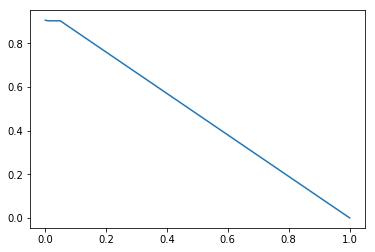

In [85]:
plotAccuracyVsLambda()

__The Curve shown above gives the relationship between the Accuracy and Lambda value
Overfitted model is one where the model learns so much about the training data that it would not perform too well with new data .In this case we got an accuracy of 95.75 percent accuracy with trained data but it may not perform well with new data therefor to avoid overfitting we introduce lambda term .Lower lambda is closer to overfitted model whereas as Lambda increases the model becomes more capable of producing better results with new data.As shown in the graph as Lambda increases the accuracy starts reducing and the model becomes more general but might not perform too well with it's own training data,this is called underfitting
0 lambda gives 90% and above lambda
0.6 lambda gives 50 % accuracy
1 lambda gives less than 10 % accuracy -this is an example of underfitting

In [86]:
fin_wts = GetFinalWeightsAvoidOverfitting(wts,Xarray,Yarray,lambda_var=0.005,Alpha=0.0005,NoI=5000)

the new wts [[ 0.0000000e+00  0.0000000e+00  0.0000000e+00  0.0000000e+00
   0.0000000e+00  0.0000000e+00  0.0000000e+00  0.0000000e+00
   0.0000000e+00  0.0000000e+00  0.0000000e+00  0.0000000e+00
   0.0000000e+00  0.0000000e+00  0.0000000e+00  0.0000000e+00
   0.0000000e+00  0.0000000e+00  0.0000000e+00  0.0000000e+00
   0.0000000e+00  0.0000000e+00  0.0000000e+00  0.0000000e+00
   0.0000000e+00  0.0000000e+00  0.0000000e+00  0.0000000e+00
   0.0000000e+00  0.0000000e+00  0.0000000e+00  0.0000000e+00
   0.0000000e+00 -9.5000000e-03 -5.9000000e-02 -3.9500000e-02
  -1.0075000e-01 -1.2775000e-01 -2.6175000e-01 -5.8575000e-01
  -7.7200000e-01 -6.6500000e-01 -7.7025000e-01 -5.8575000e-01
  -1.7275000e-01 -2.2425000e-01 -2.3500000e-01 -1.2550000e-01
  -4.8000000e-02  0.0000000e+00  0.0000000e+00  0.0000000e+00
   0.0000000e+00  0.0000000e+00  0.0000000e+00  0.0000000e+00
   0.0000000e+00  0.0000000e+00  0.0000000e+00  0.0000000e+00
   0.0000000e+00 -1.0925000e-01 -2.7875000e-01 -3.6325000e

the new wts [[-111.99295922 -111.99295922 -111.99295922 -111.99295922 -111.99295922
  -111.99295922 -111.99295922 -111.99295922 -111.99295922 -111.99295922
  -111.99295922 -111.99295922 -111.99295922 -111.99295922 -111.99295922
  -111.99295922 -111.99295922 -111.99295922 -111.99295922 -111.99295922
  -111.99295922 -111.99295922 -111.99295922 -111.99295922 -111.99295922
  -111.99295922 -111.99295922 -111.99295922 -111.99295922 -111.99295922
  -111.99295922 -111.99295922 -111.99295922 -112.00245922 -112.05195922
  -112.03245922 -112.09370922 -112.17370922 -112.38220922 -114.25770922
  -137.87745922 -117.28045922 -114.05470922 -113.53470922 -112.25170922
  -121.07320922 -137.71395922 -112.11845922 -112.04095922 -111.99295922
  -111.99295922 -111.99295922 -111.99295922 -111.99295922 -111.99295922
  -111.99295922 -111.99295922 -111.99295922 -111.99295922 -111.99295922
  -111.99295922 -112.10220922 -112.27170922 -112.35620922 -117.12370922
  -148.79395922 -139.12495922 -143.94245922 -190.667

the new wts [[-3.41272251e+02 -3.41272251e+02 -3.41272251e+02 -3.41272251e+02
  -3.41272251e+02 -3.41272251e+02 -3.41272251e+02 -3.41272251e+02
  -3.41272251e+02 -3.41272251e+02 -3.41272251e+02 -3.41272251e+02
  -3.41272251e+02 -3.41272251e+02 -3.41272251e+02 -3.41272251e+02
  -3.41272251e+02 -3.41272251e+02 -3.41272251e+02 -3.41272251e+02
  -3.41272251e+02 -3.41272251e+02 -3.41272251e+02 -3.41272251e+02
  -3.41272251e+02 -3.41272251e+02 -3.41272251e+02 -3.41272251e+02
  -3.41272251e+02 -3.41272251e+02 -3.41272251e+02 -3.41272251e+02
  -3.41272251e+02 -3.41281751e+02 -3.41331251e+02 -3.41311751e+02
  -3.41373001e+02 -3.41453001e+02 -3.41661501e+02 -3.43601001e+02
  -3.68176751e+02 -3.46723751e+02 -3.43334001e+02 -3.42814001e+02
  -3.41531001e+02 -3.53902501e+02 -3.77343251e+02 -3.41397751e+02
  -3.41320251e+02 -3.41272251e+02 -3.41272251e+02 -3.41272251e+02
  -3.41272251e+02 -3.41272251e+02 -3.41272251e+02 -3.41272251e+02
  -3.41272251e+02 -3.41272251e+02 -3.41272251e+02 -3.41272251e+0

the new wts [[-7.36732943e+02 -7.36732943e+02 -7.36732943e+02 -7.36732943e+02
  -7.36732943e+02 -7.36732943e+02 -7.36732943e+02 -7.36732943e+02
  -7.36732943e+02 -7.36732943e+02 -7.36732943e+02 -7.36732943e+02
  -7.36732943e+02 -7.36732943e+02 -7.36732943e+02 -7.36732943e+02
  -7.36732943e+02 -7.36732943e+02 -7.36732943e+02 -7.36732943e+02
  -7.36732943e+02 -7.36732943e+02 -7.36732943e+02 -7.36732943e+02
  -7.36732943e+02 -7.36732943e+02 -7.36732943e+02 -7.36732943e+02
  -7.36732943e+02 -7.36732943e+02 -7.36732943e+02 -7.36732943e+02
  -7.36732943e+02 -7.36742443e+02 -7.36791943e+02 -7.36772443e+02
  -7.36833693e+02 -7.36913693e+02 -7.37122193e+02 -7.39061693e+02
  -7.63637443e+02 -7.42184443e+02 -7.38794693e+02 -7.38274693e+02
  -7.36991693e+02 -7.49363193e+02 -7.72803943e+02 -7.36858443e+02
  -7.36780943e+02 -7.36732943e+02 -7.36732943e+02 -7.36732943e+02
  -7.36732943e+02 -7.36732943e+02 -7.36732943e+02 -7.36732943e+02
  -7.36732943e+02 -7.36732943e+02 -7.36732943e+02 -7.36732943e+0

the new wts [[-1399.10192508 -1399.10192508 -1399.10192508 -1399.10192508
  -1399.10192508 -1399.10192508 -1399.10192508 -1399.10192508
  -1399.10192508 -1399.10192508 -1399.10192508 -1399.10192508
  -1399.10192508 -1399.10192508 -1399.10192508 -1399.10192508
  -1399.10192508 -1399.10192508 -1399.10192508 -1399.10192508
  -1399.10192508 -1399.10192508 -1399.10192508 -1399.10192508
  -1399.10192508 -1399.10192508 -1399.10192508 -1399.10192508
  -1399.10192508 -1399.10192508 -1399.10192508 -1399.10192508
  -1399.10192508 -1399.11142508 -1399.16092508 -1399.14142508
  -1399.20267508 -1399.28267508 -1399.49117508 -1401.43067508
  -1426.00642508 -1404.55342508 -1401.16367508 -1400.64367508
  -1399.36067508 -1411.73217508 -1435.17292508 -1399.22742508
  -1399.14992508 -1399.10192508 -1399.10192508 -1399.10192508
  -1399.10192508 -1399.10192508 -1399.10192508 -1399.10192508
  -1399.10192508 -1399.10192508 -1399.10192508 -1399.10192508
  -1399.10192508 -1399.21117508 -1399.38067508 -1399.48117

the new wts [[-2.51150886e+03 -2.51150886e+03 -2.51150886e+03 -2.51150886e+03
  -2.51150886e+03 -2.51150886e+03 -2.51150886e+03 -2.51150886e+03
  -2.51150886e+03 -2.51150886e+03 -2.51150886e+03 -2.51150886e+03
  -2.51150886e+03 -2.51150886e+03 -2.51150886e+03 -2.51150886e+03
  -2.51150886e+03 -2.51150886e+03 -2.51150886e+03 -2.51150886e+03
  -2.51150886e+03 -2.51150886e+03 -2.51150886e+03 -2.51150886e+03
  -2.51150886e+03 -2.51150886e+03 -2.51150886e+03 -2.51150886e+03
  -2.51150886e+03 -2.51150886e+03 -2.51150886e+03 -2.51150886e+03
  -2.51150886e+03 -2.51151836e+03 -2.51156786e+03 -2.51154836e+03
  -2.51160961e+03 -2.51168961e+03 -2.51189811e+03 -2.51383761e+03
  -2.53841336e+03 -2.51696036e+03 -2.51357061e+03 -2.51305061e+03
  -2.51176761e+03 -2.52413911e+03 -2.54757986e+03 -2.51163436e+03
  -2.51155686e+03 -2.51150886e+03 -2.51150886e+03 -2.51150886e+03
  -2.51150886e+03 -2.51150886e+03 -2.51150886e+03 -2.51150886e+03
  -2.51150886e+03 -2.51150886e+03 -2.51150886e+03 -2.51150886e+0

the new wts [[-4.43371874e+03 -4.43371874e+03 -4.43371874e+03 -4.43371874e+03
  -4.43371874e+03 -4.43371874e+03 -4.43371874e+03 -4.43371874e+03
  -4.43371874e+03 -4.43371874e+03 -4.43371874e+03 -4.43371874e+03
  -4.43371874e+03 -4.43371874e+03 -4.43371874e+03 -4.43371874e+03
  -4.43371874e+03 -4.43371874e+03 -4.43371874e+03 -4.43371874e+03
  -4.43371874e+03 -4.43371874e+03 -4.43371874e+03 -4.43371874e+03
  -4.43371874e+03 -4.43371874e+03 -4.43371874e+03 -4.43371874e+03
  -4.43371874e+03 -4.43371874e+03 -4.43371874e+03 -4.43371874e+03
  -4.43371874e+03 -4.43372824e+03 -4.43377774e+03 -4.43375824e+03
  -4.43381949e+03 -4.43389949e+03 -4.43410799e+03 -4.43604749e+03
  -4.46062324e+03 -4.43917024e+03 -4.43578049e+03 -4.43526049e+03
  -4.43397749e+03 -4.44634899e+03 -4.46978974e+03 -4.43384424e+03
  -4.43376674e+03 -4.43371874e+03 -4.43371874e+03 -4.43371874e+03
  -4.43371874e+03 -4.43371874e+03 -4.43371874e+03 -4.43371874e+03
  -4.43371874e+03 -4.43371874e+03 -4.43371874e+03 -4.43371874e+0

the new wts [[-7.88231793e+03 -7.88231793e+03 -7.88231793e+03 -7.88231793e+03
  -7.88231793e+03 -7.88231793e+03 -7.88231793e+03 -7.88231793e+03
  -7.88231793e+03 -7.88231793e+03 -7.88231793e+03 -7.88231793e+03
  -7.88231793e+03 -7.88231793e+03 -7.88231793e+03 -7.88231793e+03
  -7.88231793e+03 -7.88231793e+03 -7.88231793e+03 -7.88231793e+03
  -7.88231793e+03 -7.88231793e+03 -7.88231793e+03 -7.88231793e+03
  -7.88231793e+03 -7.88231793e+03 -7.88231793e+03 -7.88231793e+03
  -7.88231793e+03 -7.88231793e+03 -7.88231793e+03 -7.88231793e+03
  -7.88231793e+03 -7.88232743e+03 -7.88237693e+03 -7.88235743e+03
  -7.88241868e+03 -7.88249868e+03 -7.88270718e+03 -7.88464668e+03
  -7.90922243e+03 -7.88776943e+03 -7.88437968e+03 -7.88385968e+03
  -7.88257668e+03 -7.89494818e+03 -7.91838893e+03 -7.88244343e+03
  -7.88236593e+03 -7.88231793e+03 -7.88231793e+03 -7.88231793e+03
  -7.88231793e+03 -7.88231793e+03 -7.88231793e+03 -7.88231793e+03
  -7.88231793e+03 -7.88231793e+03 -7.88231793e+03 -7.88231793e+0

the new wts [[-14289.3970167  -14289.3970167  -14289.3970167  -14289.3970167
  -14289.3970167  -14289.3970167  -14289.3970167  -14289.3970167
  -14289.3970167  -14289.3970167  -14289.3970167  -14289.3970167
  -14289.3970167  -14289.3970167  -14289.3970167  -14289.3970167
  -14289.3970167  -14289.3970167  -14289.3970167  -14289.3970167
  -14289.3970167  -14289.3970167  -14289.3970167  -14289.3970167
  -14289.3970167  -14289.3970167  -14289.3970167  -14289.3970167
  -14289.3970167  -14289.3970167  -14289.3970167  -14289.3970167
  -14289.3970167  -14289.4065167  -14289.4560167  -14289.4365167
  -14289.4977667  -14289.5777667  -14289.7862667  -14291.7257667
  -14316.3015167  -14294.8485167  -14291.4587667  -14290.9387667
  -14289.6557667  -14302.0272667  -14325.4680167  -14289.5225167
  -14289.4450167  -14289.3970167  -14289.3970167  -14289.3970167
  -14289.3970167  -14289.3970167  -14289.3970167  -14289.3970167
  -14289.3970167  -14289.3970167  -14289.3970167  -14289.3970167
  -14289.3970

the new wts [[-2.66086173e+04 -2.66086173e+04 -2.66086173e+04 -2.66086173e+04
  -2.66086173e+04 -2.66086173e+04 -2.66086173e+04 -2.66086173e+04
  -2.66086173e+04 -2.66086173e+04 -2.66086173e+04 -2.66086173e+04
  -2.66086173e+04 -2.66086173e+04 -2.66086173e+04 -2.66086173e+04
  -2.66086173e+04 -2.66086173e+04 -2.66086173e+04 -2.66086173e+04
  -2.66086173e+04 -2.66086173e+04 -2.66086173e+04 -2.66086173e+04
  -2.66086173e+04 -2.66086173e+04 -2.66086173e+04 -2.66086173e+04
  -2.66086173e+04 -2.66086173e+04 -2.66086173e+04 -2.66086173e+04
  -2.66086173e+04 -2.66086268e+04 -2.66086763e+04 -2.66086568e+04
  -2.66087180e+04 -2.66087980e+04 -2.66090065e+04 -2.66109460e+04
  -2.66355218e+04 -2.66140688e+04 -2.66106790e+04 -2.66101590e+04
  -2.66088760e+04 -2.66212475e+04 -2.66446883e+04 -2.66087428e+04
  -2.66086653e+04 -2.66086173e+04 -2.66086173e+04 -2.66086173e+04
  -2.66086173e+04 -2.66086173e+04 -2.66086173e+04 -2.66086173e+04
  -2.66086173e+04 -2.66086173e+04 -2.66086173e+04 -2.66086173e+0

__The regularization is done by slightly increases the lambda value here it is 0.005 and below is the regularised image .This image gives an accuracy of 90% which is lesser than the one without regularisation but this would perform better with new test data as compared to the model without regularization.

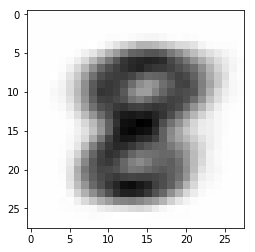

In [87]:
plt.imshow(fin_wts.reshape(28,28),cmap='binary')